## Содержание
1. [Import](#import)
2. [Check Dataset](#check-dataset)<br>
3. [Data Cleaning](#data-cleaning)<br>
4. [Feature Engineering](#feat-eng)<br>
5. [Data Preprocessing](#data-prepr)<br>
6. [Model Building](#model-build)<br>
7. [Predict](#predict)<br>
8. [Save Results](#save-res)

# Import<a class="anchor" id="import"></a>

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

from sklearn.pipeline import make_pipeline
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import RobustScaler

from sklearn.metrics import mean_absolute_error, mean_squared_error

from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV
from sklearn.ensemble import GradientBoostingRegressor

## Check DataSet (Проверка датасета)<a class="anchor" id="check-dataset"></a>

In [4]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
test_id = test.Id

In [5]:
train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [6]:
test

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


In [7]:
train.loc[332, 'BsmtFinType2']

nan

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [9]:
test.shape

(1459, 80)

In [10]:
train.shape

(1460, 81)

In [11]:
train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

<Axes: xlabel='SalePrice', ylabel='Count'>

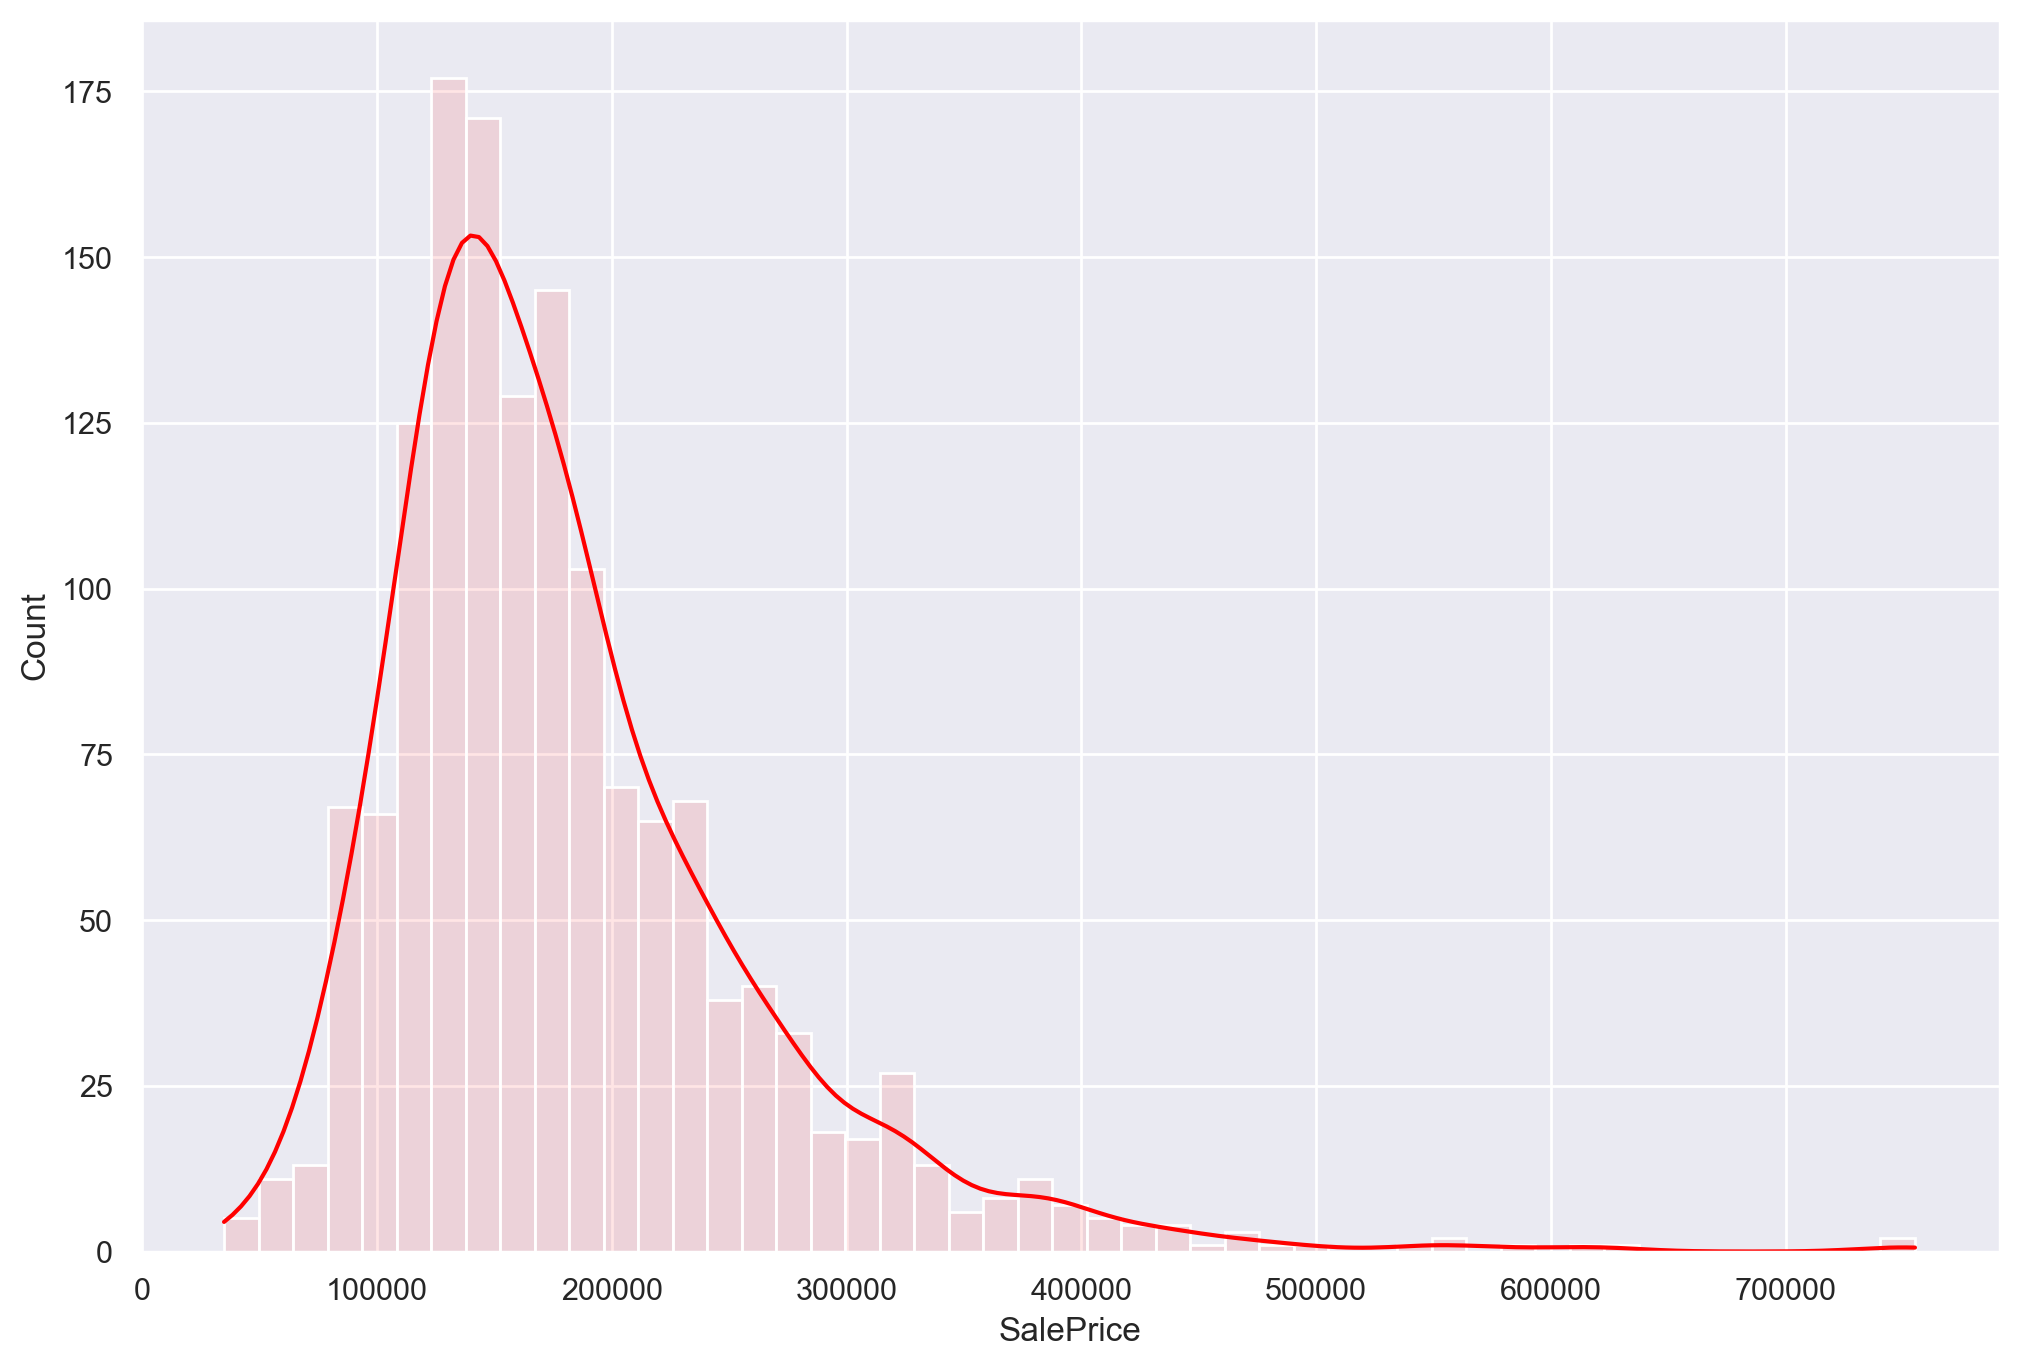

In [12]:
plt.figure(figsize=(12, 8), dpi=200)
sns.set(font_scale=1)
sns.histplot(train['SalePrice'], kde=True, alpha=0.1, color='red')

In [13]:
def get_skew_kurt(df, feature):
    print(f'Ассиметрия: {round(df[feature].skew(), 2)}')
    print(f'Эксцесс: {round(df[feature].kurt(), 2)}')

In [14]:
# Рассчитываем ассиметрию и эксцесс
get_skew_kurt(train, 'SalePrice')

Ассиметрия: 1.88
Эксцесс: 6.54


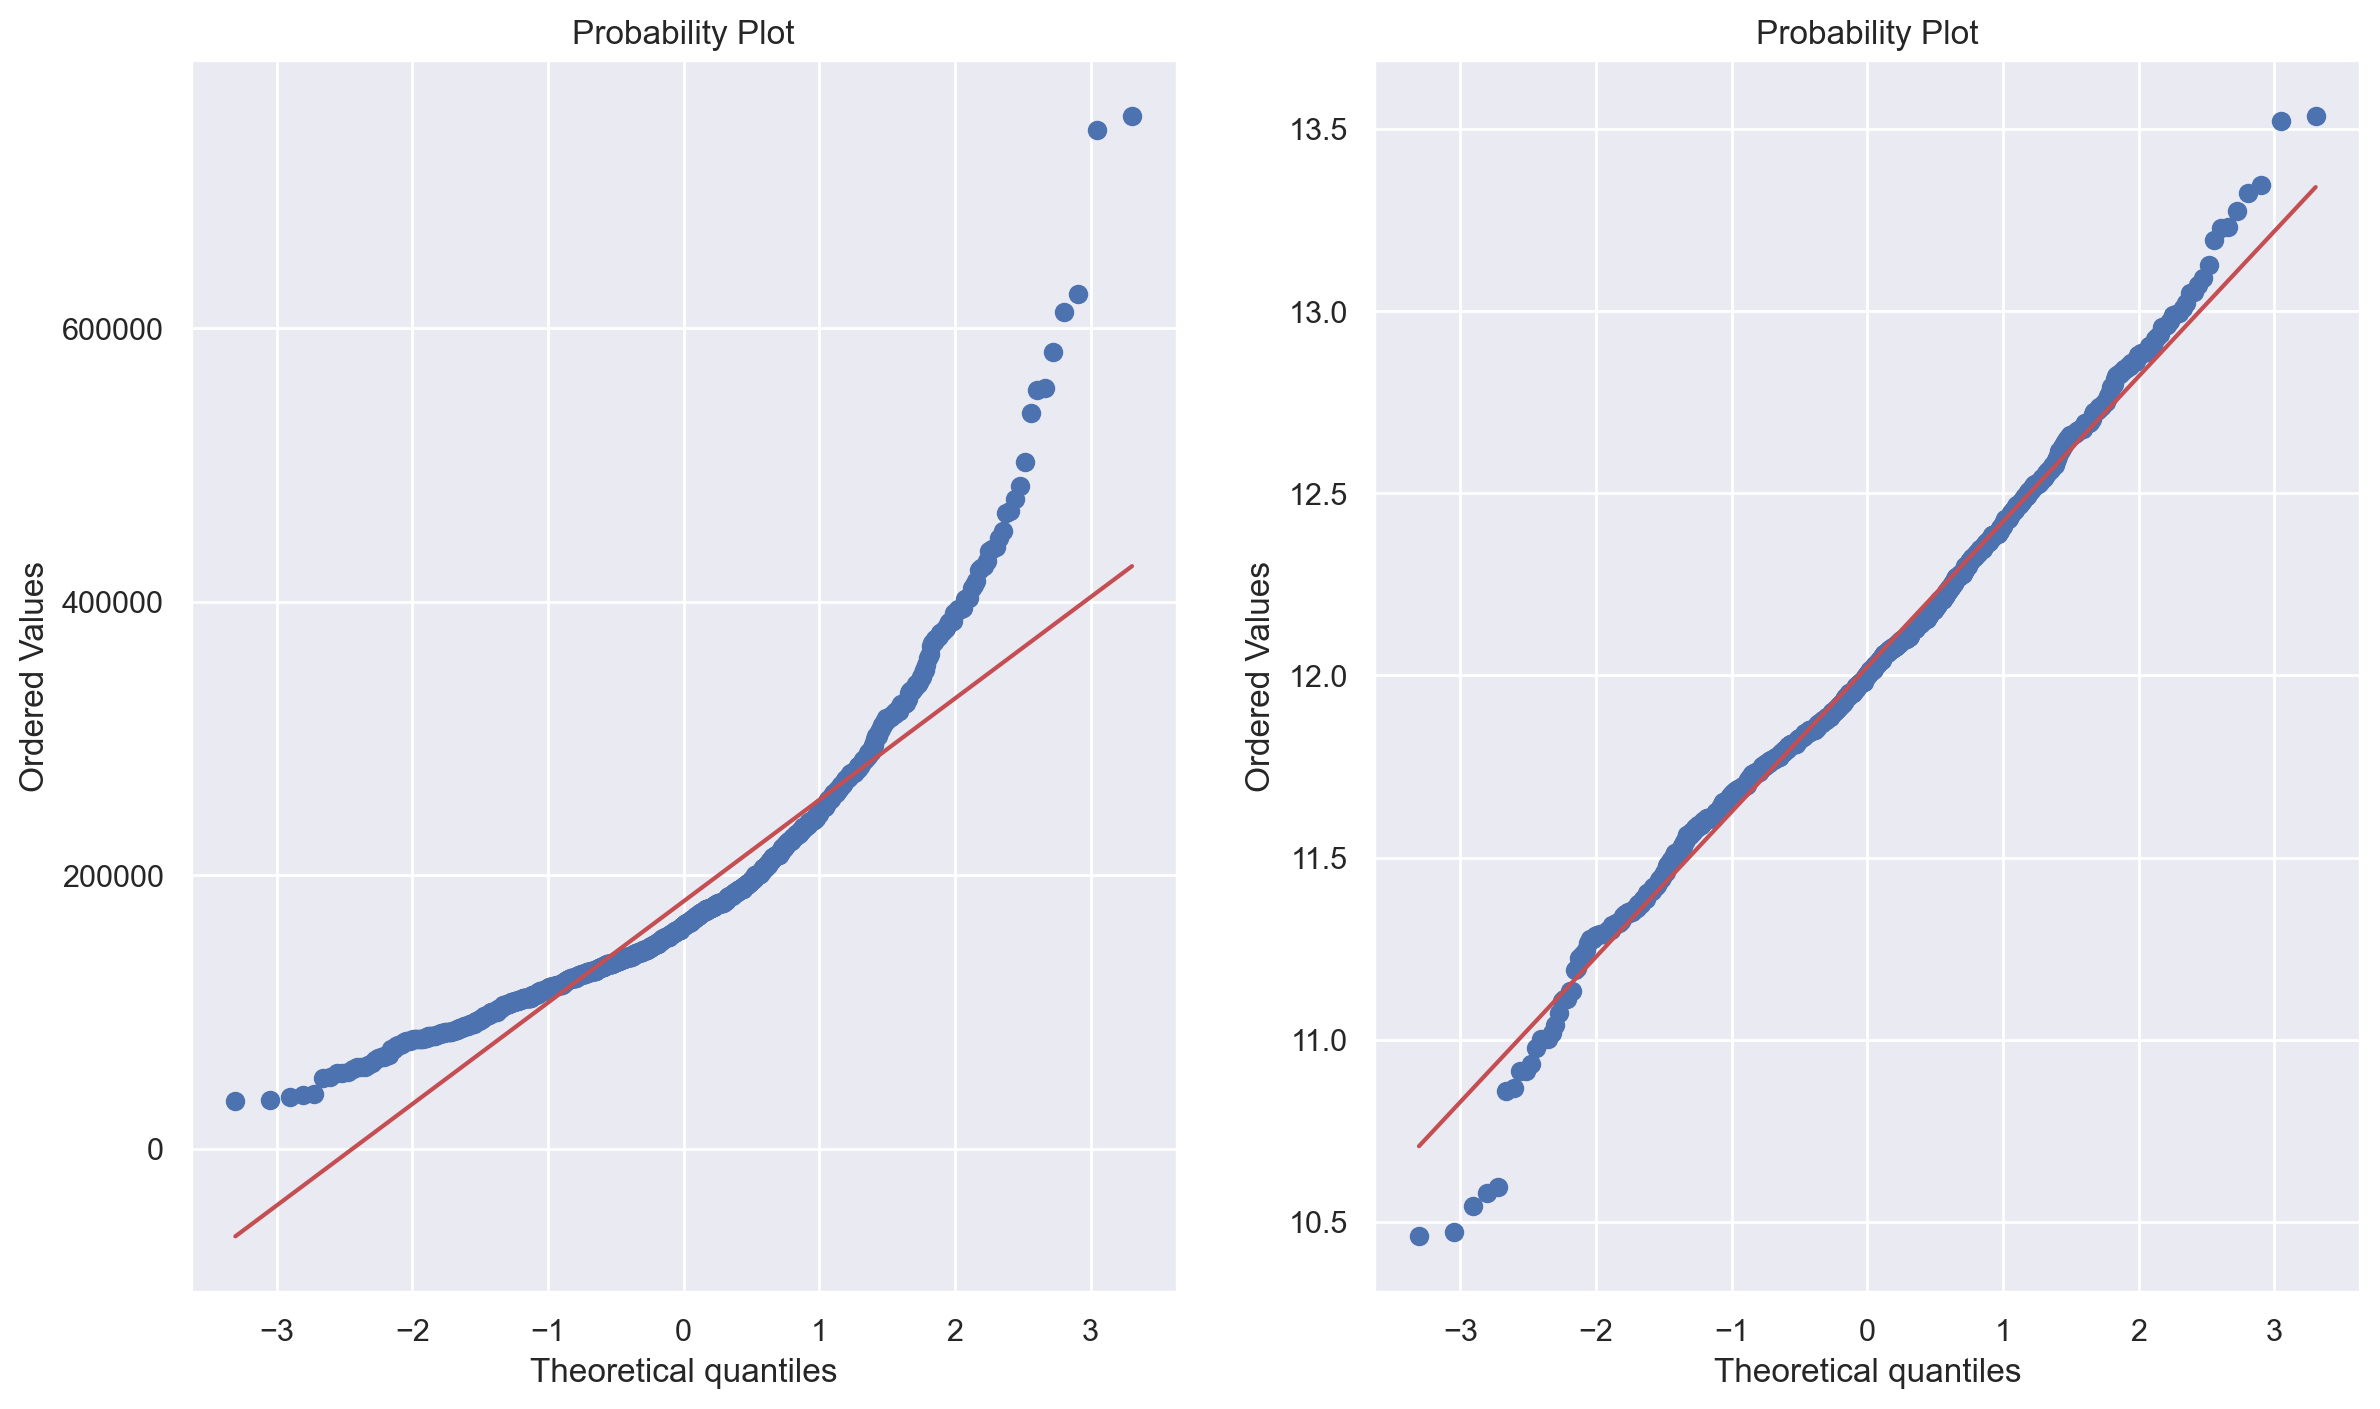

In [15]:
fig = plt.figure(figsize = (14,8), dpi=200)
# Распределение на необработанных данных
fig.add_subplot(1,2,1)
res = stats.probplot(train['SalePrice'], plot=plt)

# Распределение при условии, что мы прологарифмировали 'SalePrice'
fig.add_subplot(1,2,2)
res = stats.probplot(np.log1p(train['SalePrice']), plot=plt)

<Axes: xlabel='SalePrice', ylabel='Count'>

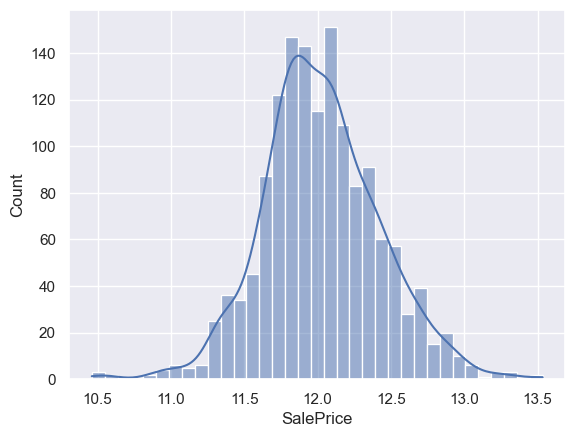

In [16]:
sns.histplot(np.log1p(train['SalePrice']), kde=True)

In [17]:
train['SalePrice'] = np.log1p(train['SalePrice'])

In [18]:
get_skew_kurt(train, 'SalePrice')

Ассиметрия: 0.12
Эксцесс: 0.81


C:\Users\abaku\AppData\Local\Temp\ipykernel_22008\3549034926.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train.corr(), linewidths=.3, cmap='Greys')


<Axes: >

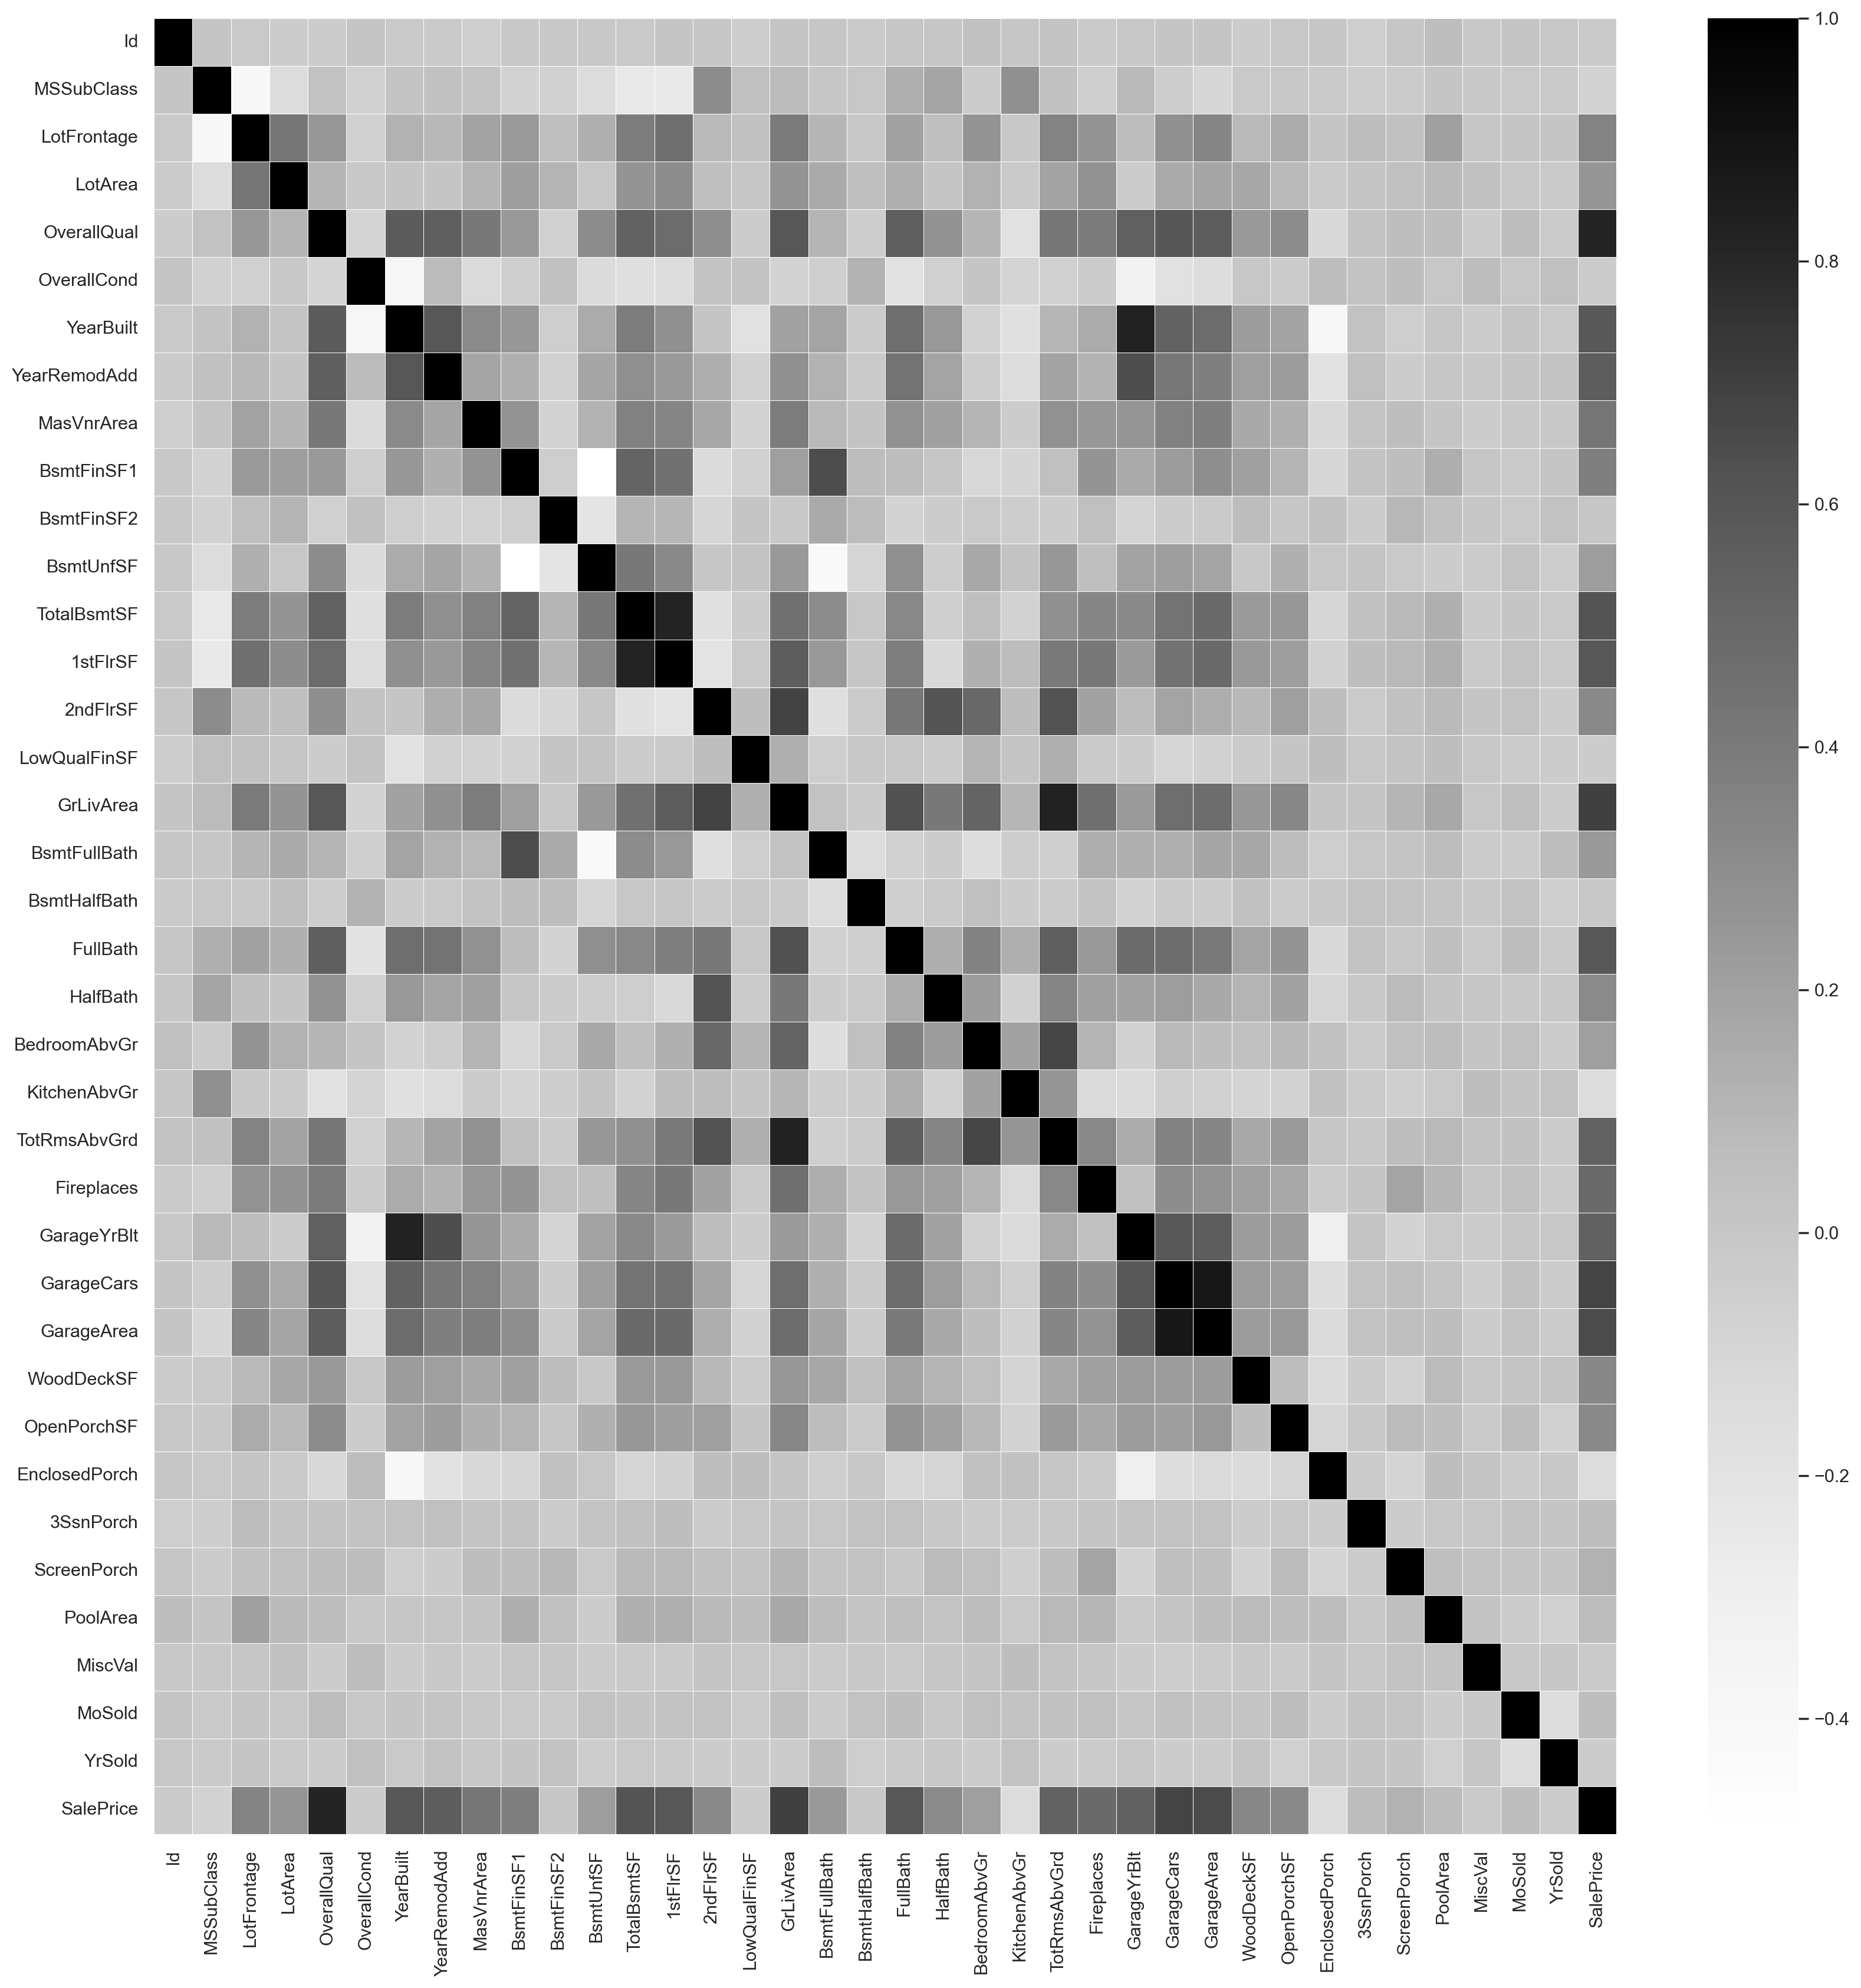

In [19]:
plt.figure(figsize=(20, 20), dpi=200)
sns.heatmap(train.corr(), linewidths=.3, cmap='Greys')

C:\Users\abaku\AppData\Local\Temp\ipykernel_22008\866440826.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cols = train.corr().nlargest(10, 'SalePrice')['SalePrice'].index


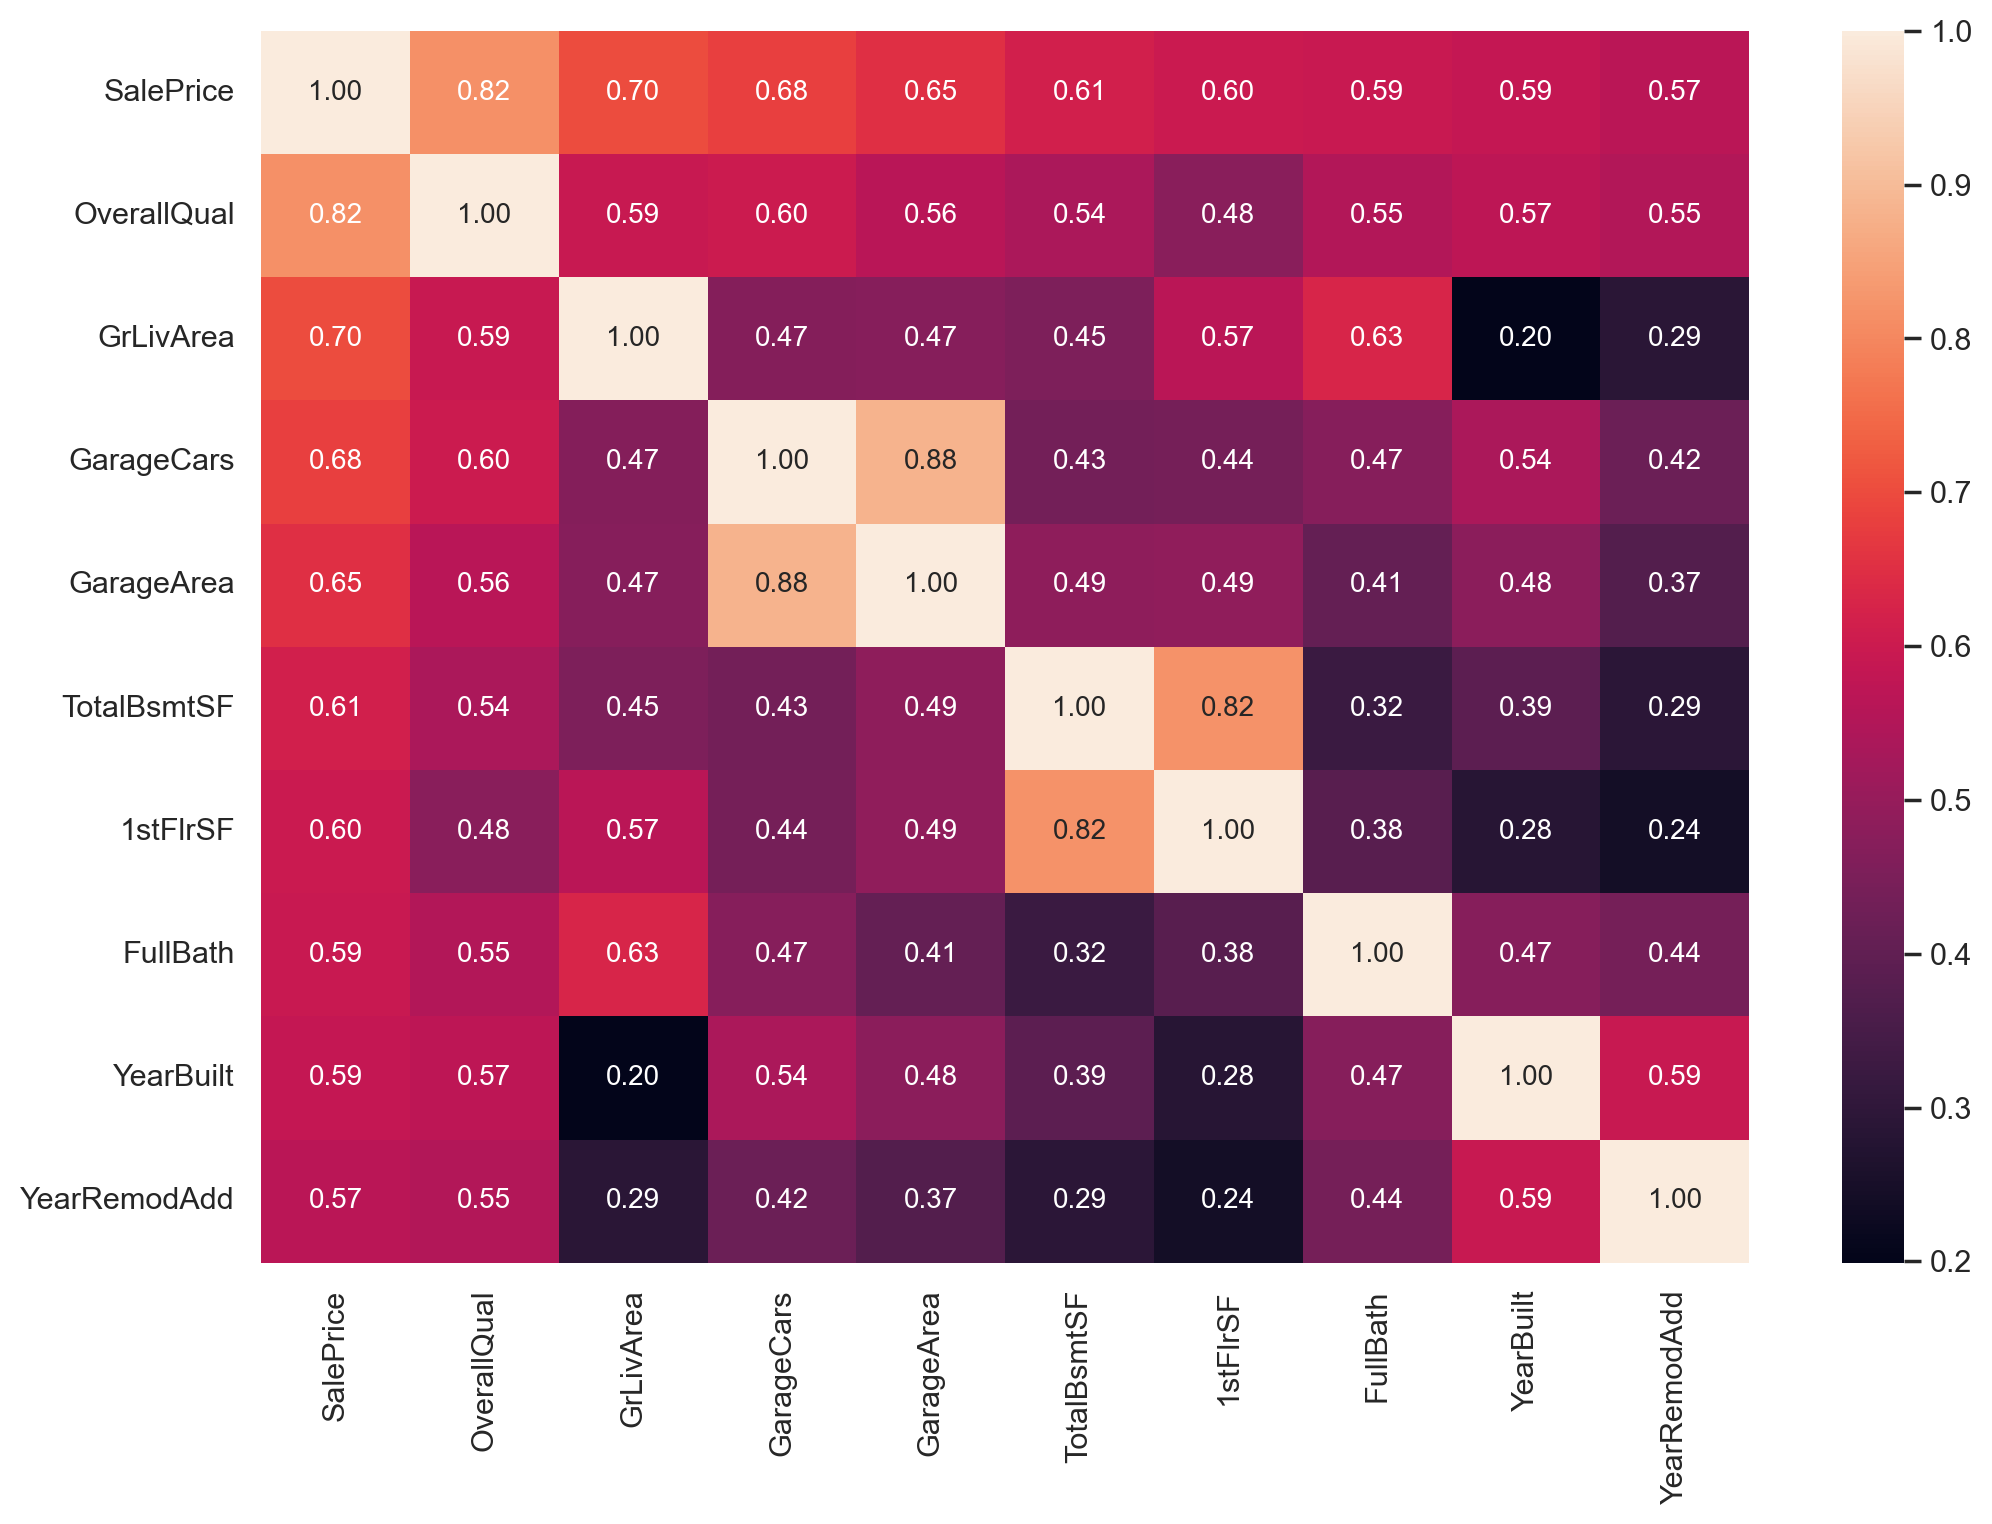

In [20]:
# Матрица корреляции
cols = train.corr().nlargest(10, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(train[cols].values.T)
plt.figure(figsize=(12, 8), dpi=200)
sns.heatmap(cm, yticklabels=cols.values, xticklabels=cols.values, annot=True, fmt='.2f',  
            annot_kws={'size': 10}, square=False);

<Axes: xlabel='GrLivArea', ylabel='SalePrice'>

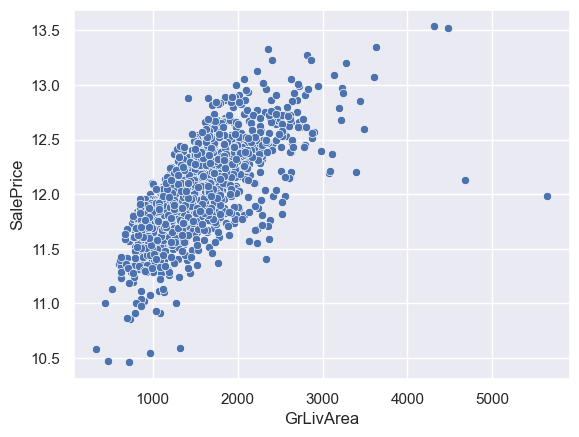

In [21]:
plt.plot(figsize=(12, 8), dpi=200)
sns.scatterplot(train, x='GrLivArea', y='SalePrice')

<Axes: xlabel='OverallQual', ylabel='SalePrice'>

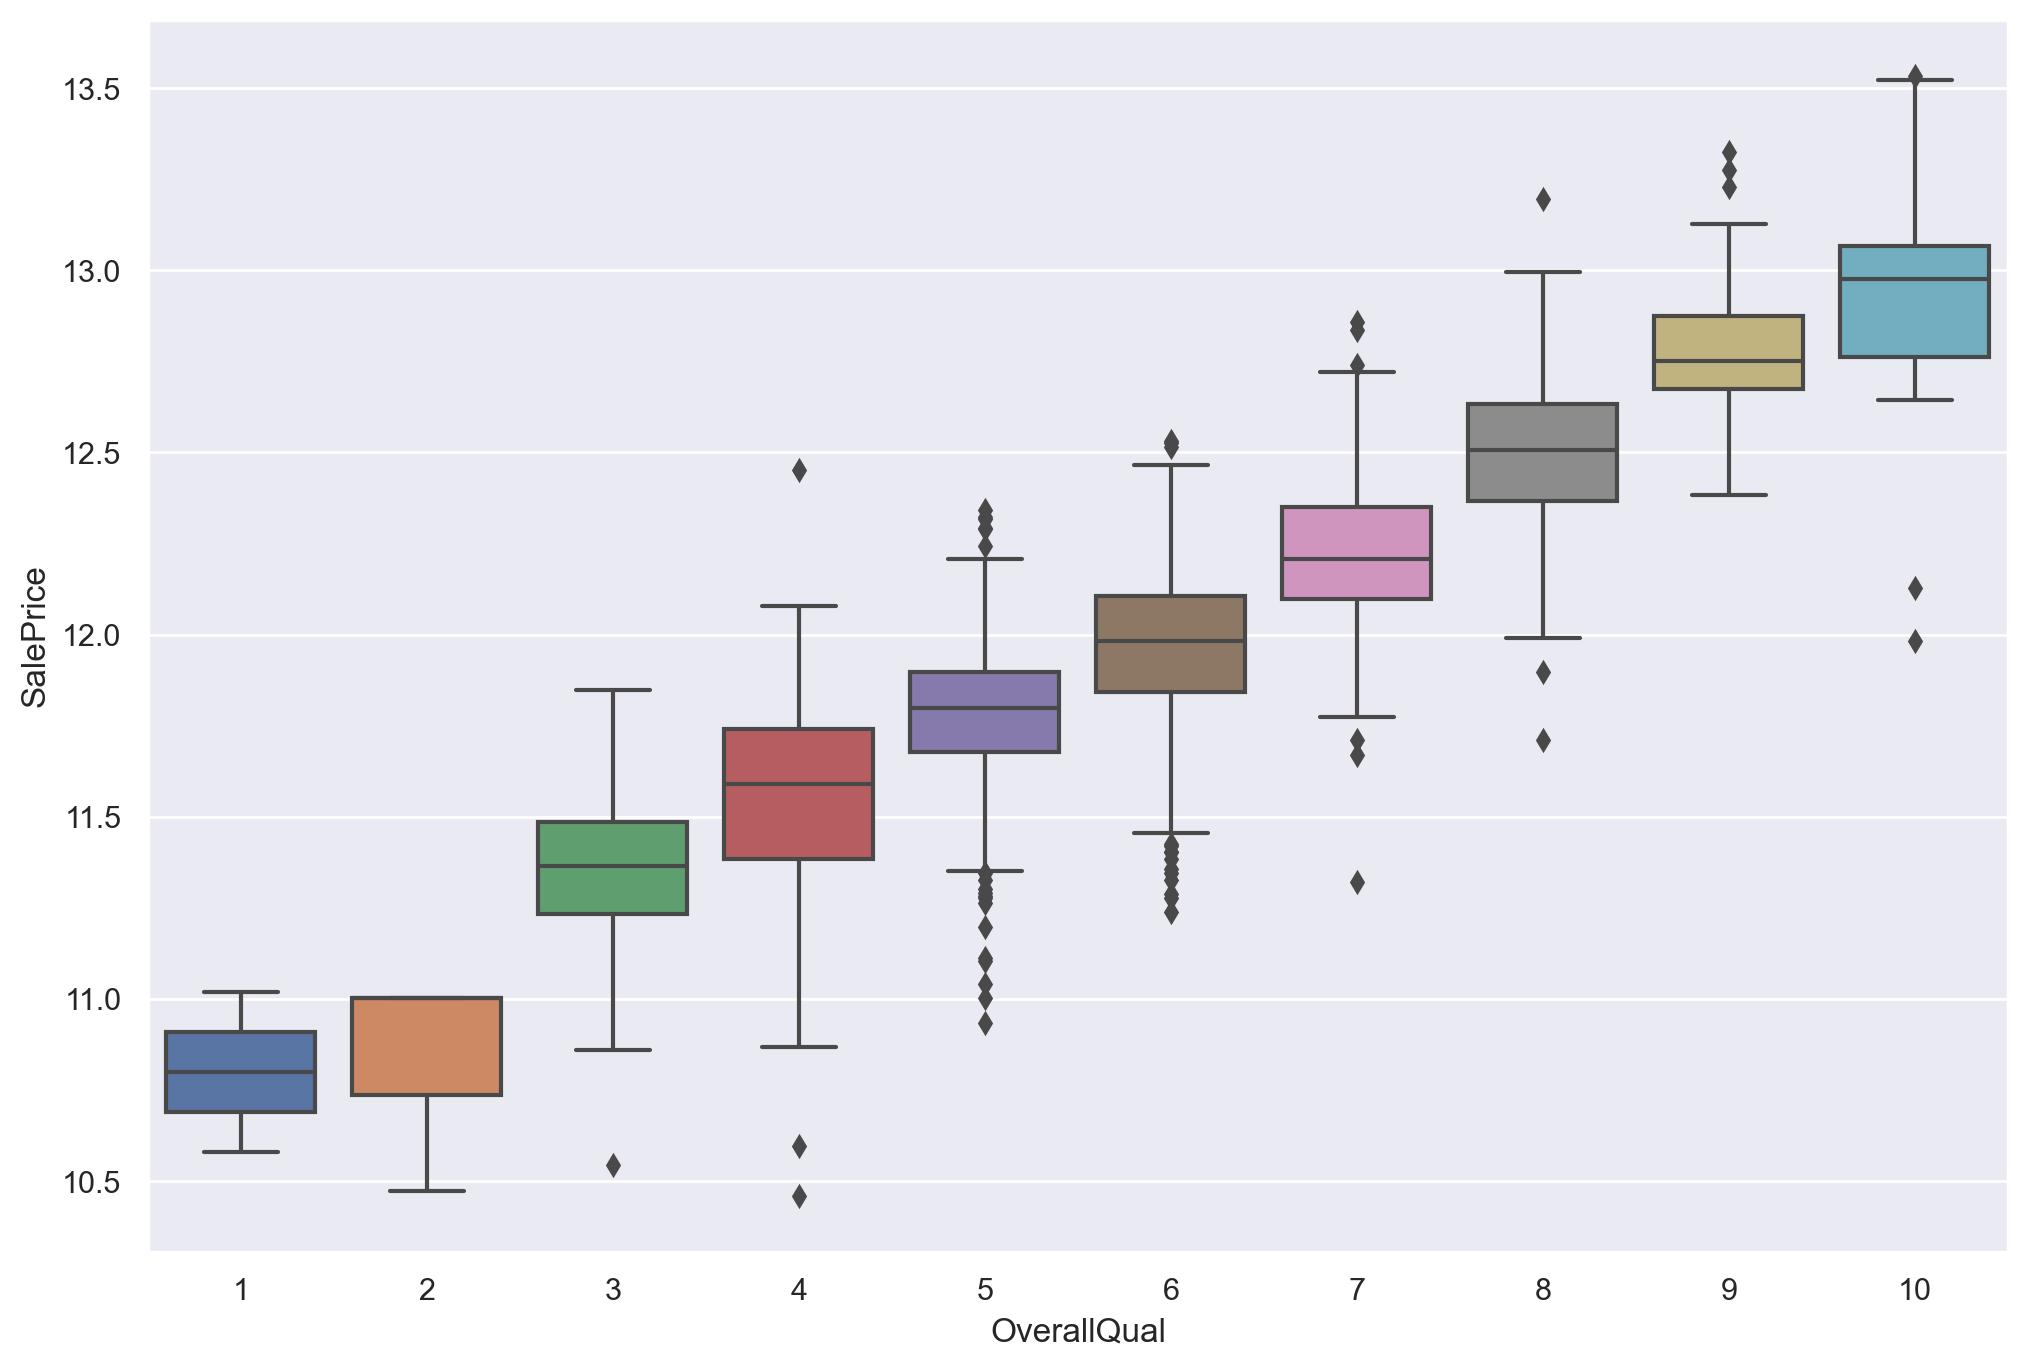

In [22]:
plt.figure(figsize=(12, 8), dpi=200)
sns.boxplot(train, x='OverallQual', y='SalePrice')

<Axes: xlabel='GarageCars', ylabel='SalePrice'>

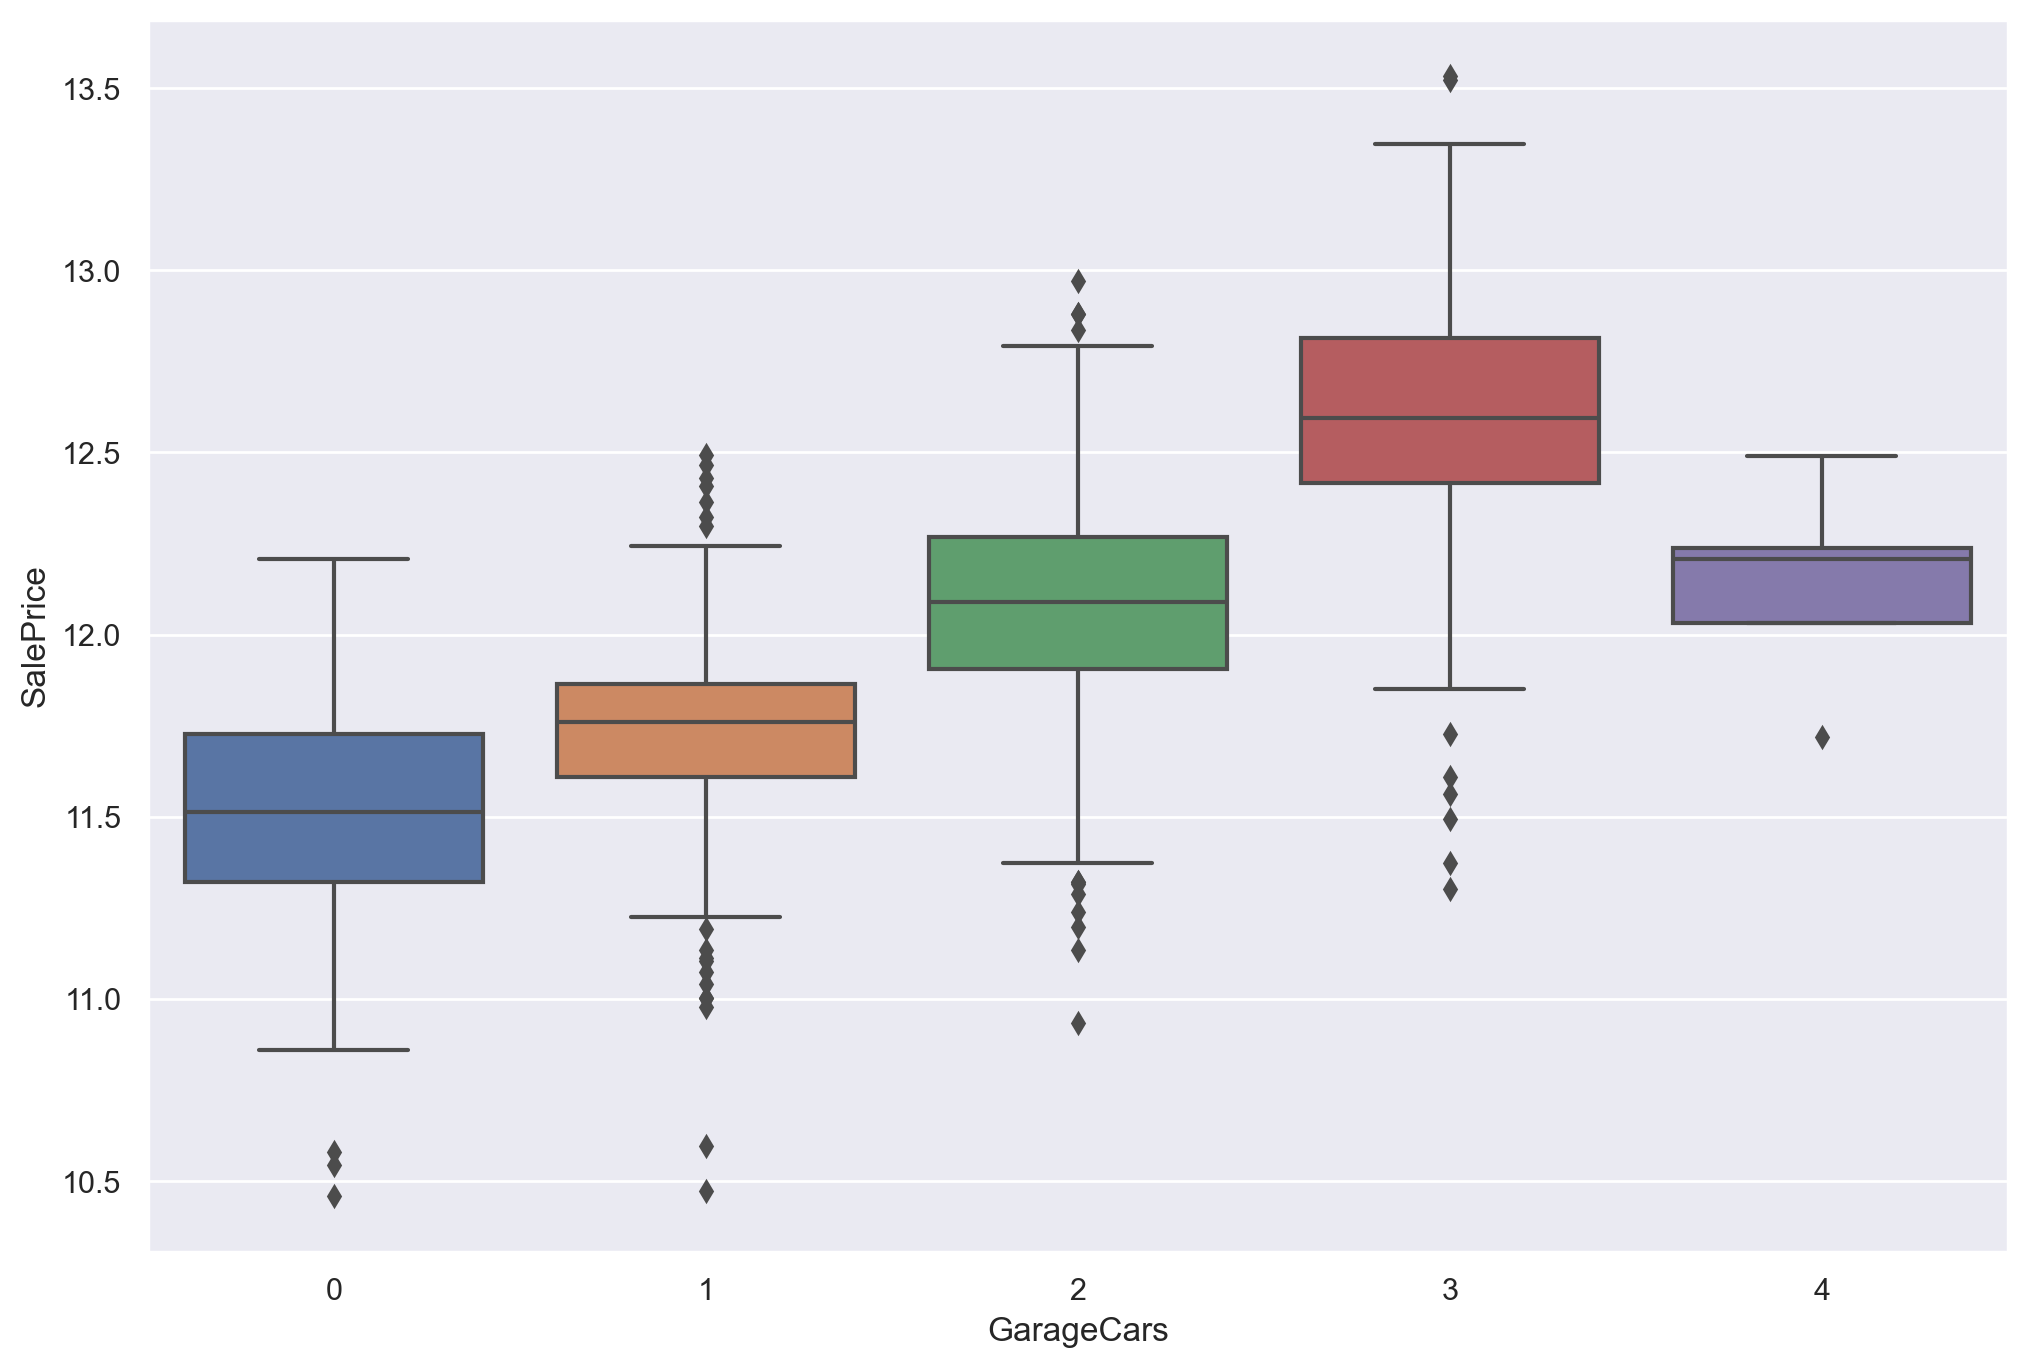

In [23]:
plt.figure(figsize=(12, 8), dpi=200)
sns.boxplot(train, x='GarageCars', y='SalePrice')

<Axes: xlabel='GarageArea', ylabel='SalePrice'>

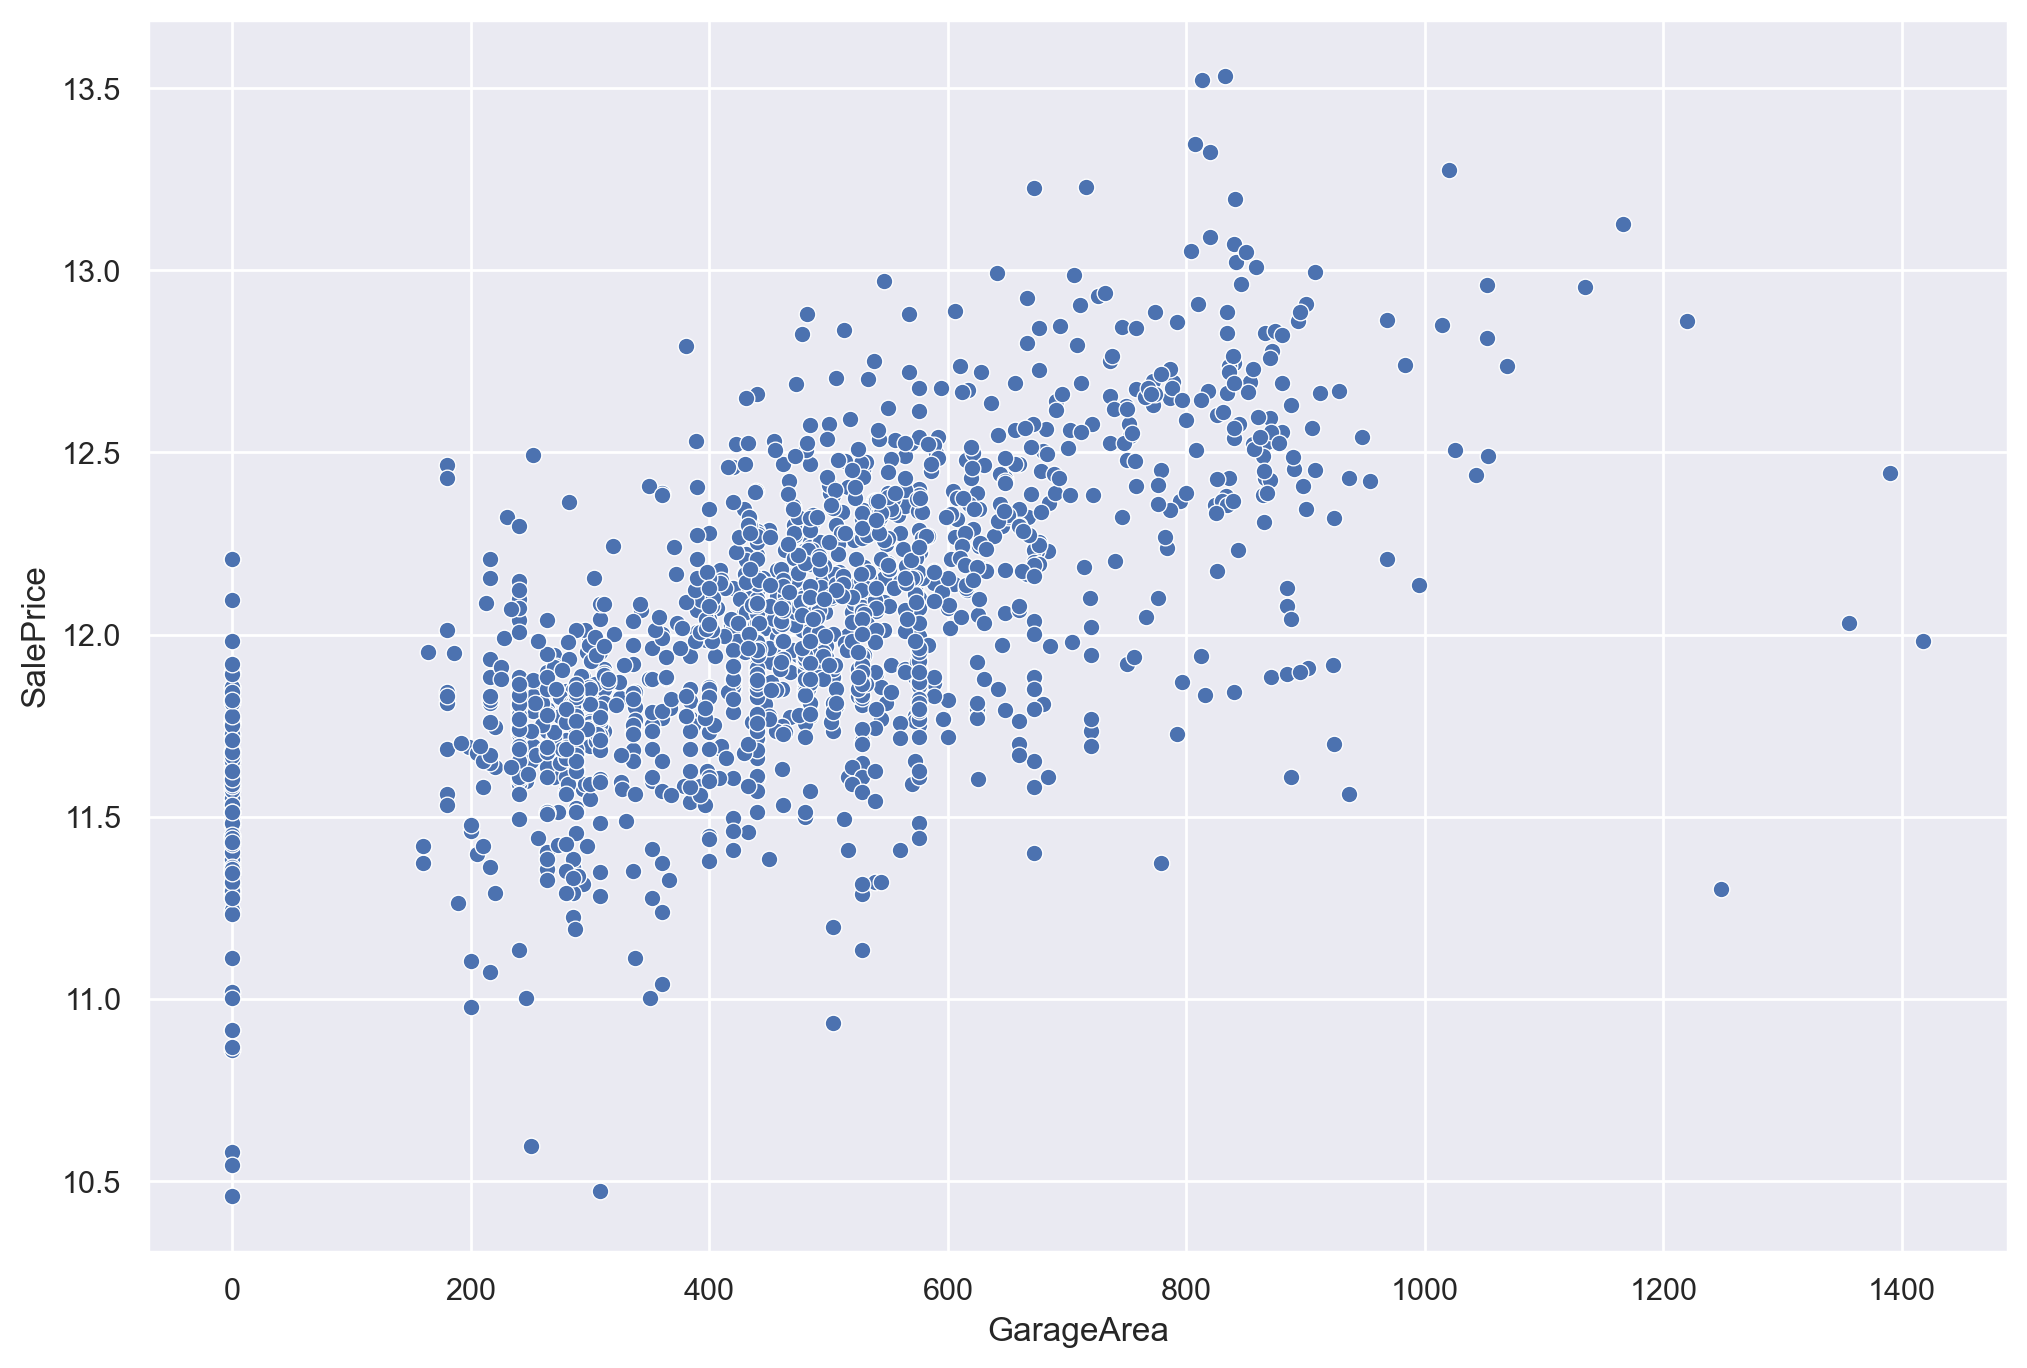

In [24]:
plt.figure(figsize=(12, 8), dpi=200)
sns.scatterplot(train, x='GarageArea', y='SalePrice')

<Axes: xlabel='TotalBsmtSF', ylabel='SalePrice'>

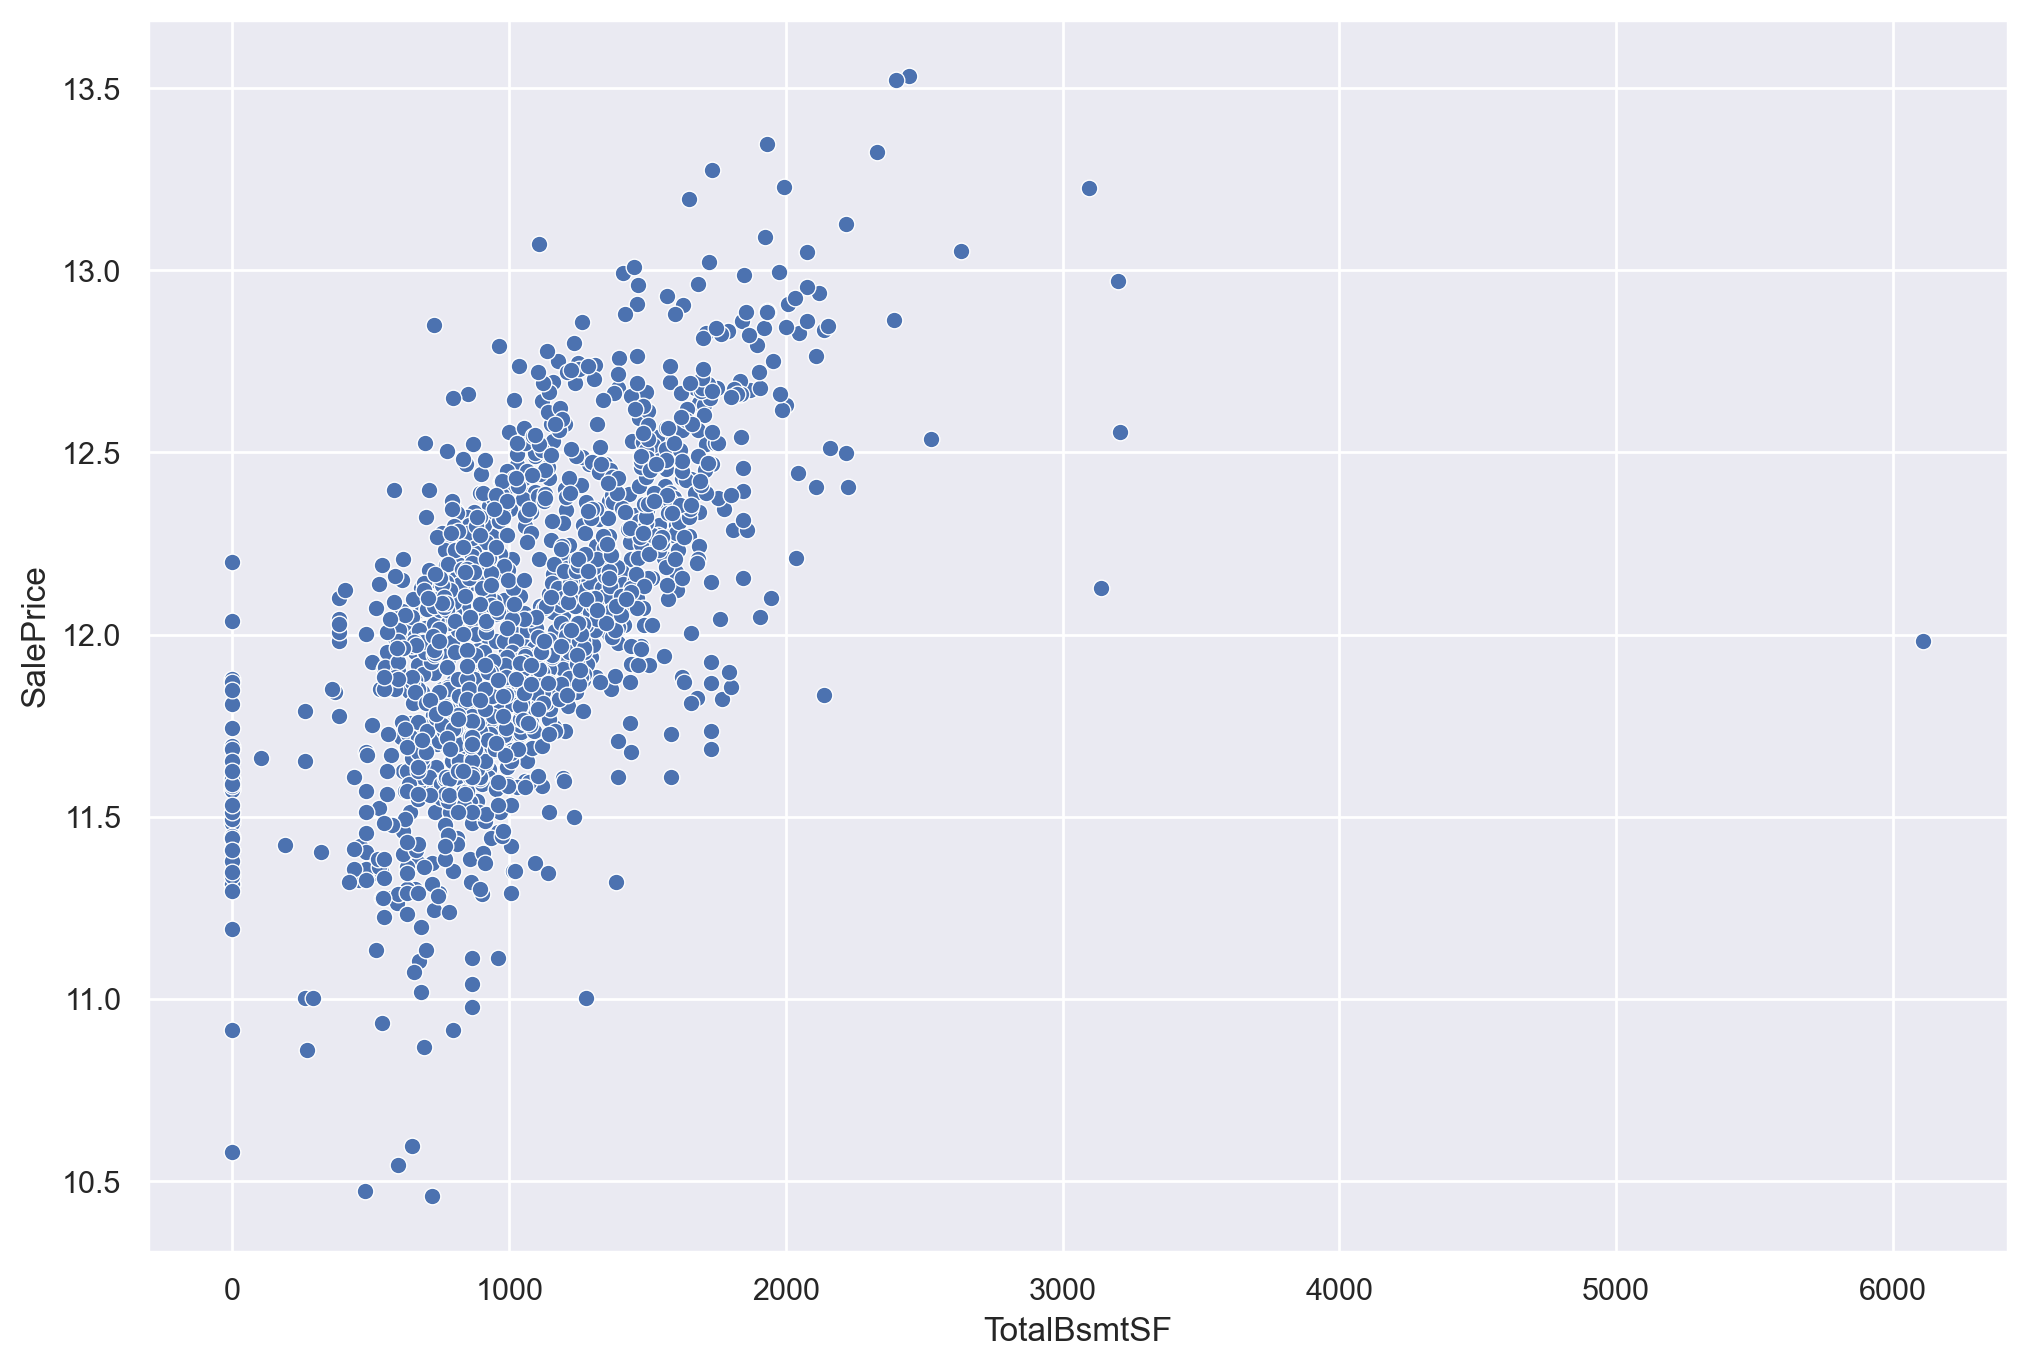

In [25]:
plt.figure(figsize=(12, 8), dpi=200)
sns.scatterplot(train, x='TotalBsmtSF', y='SalePrice')

<Axes: xlabel='1stFlrSF', ylabel='SalePrice'>

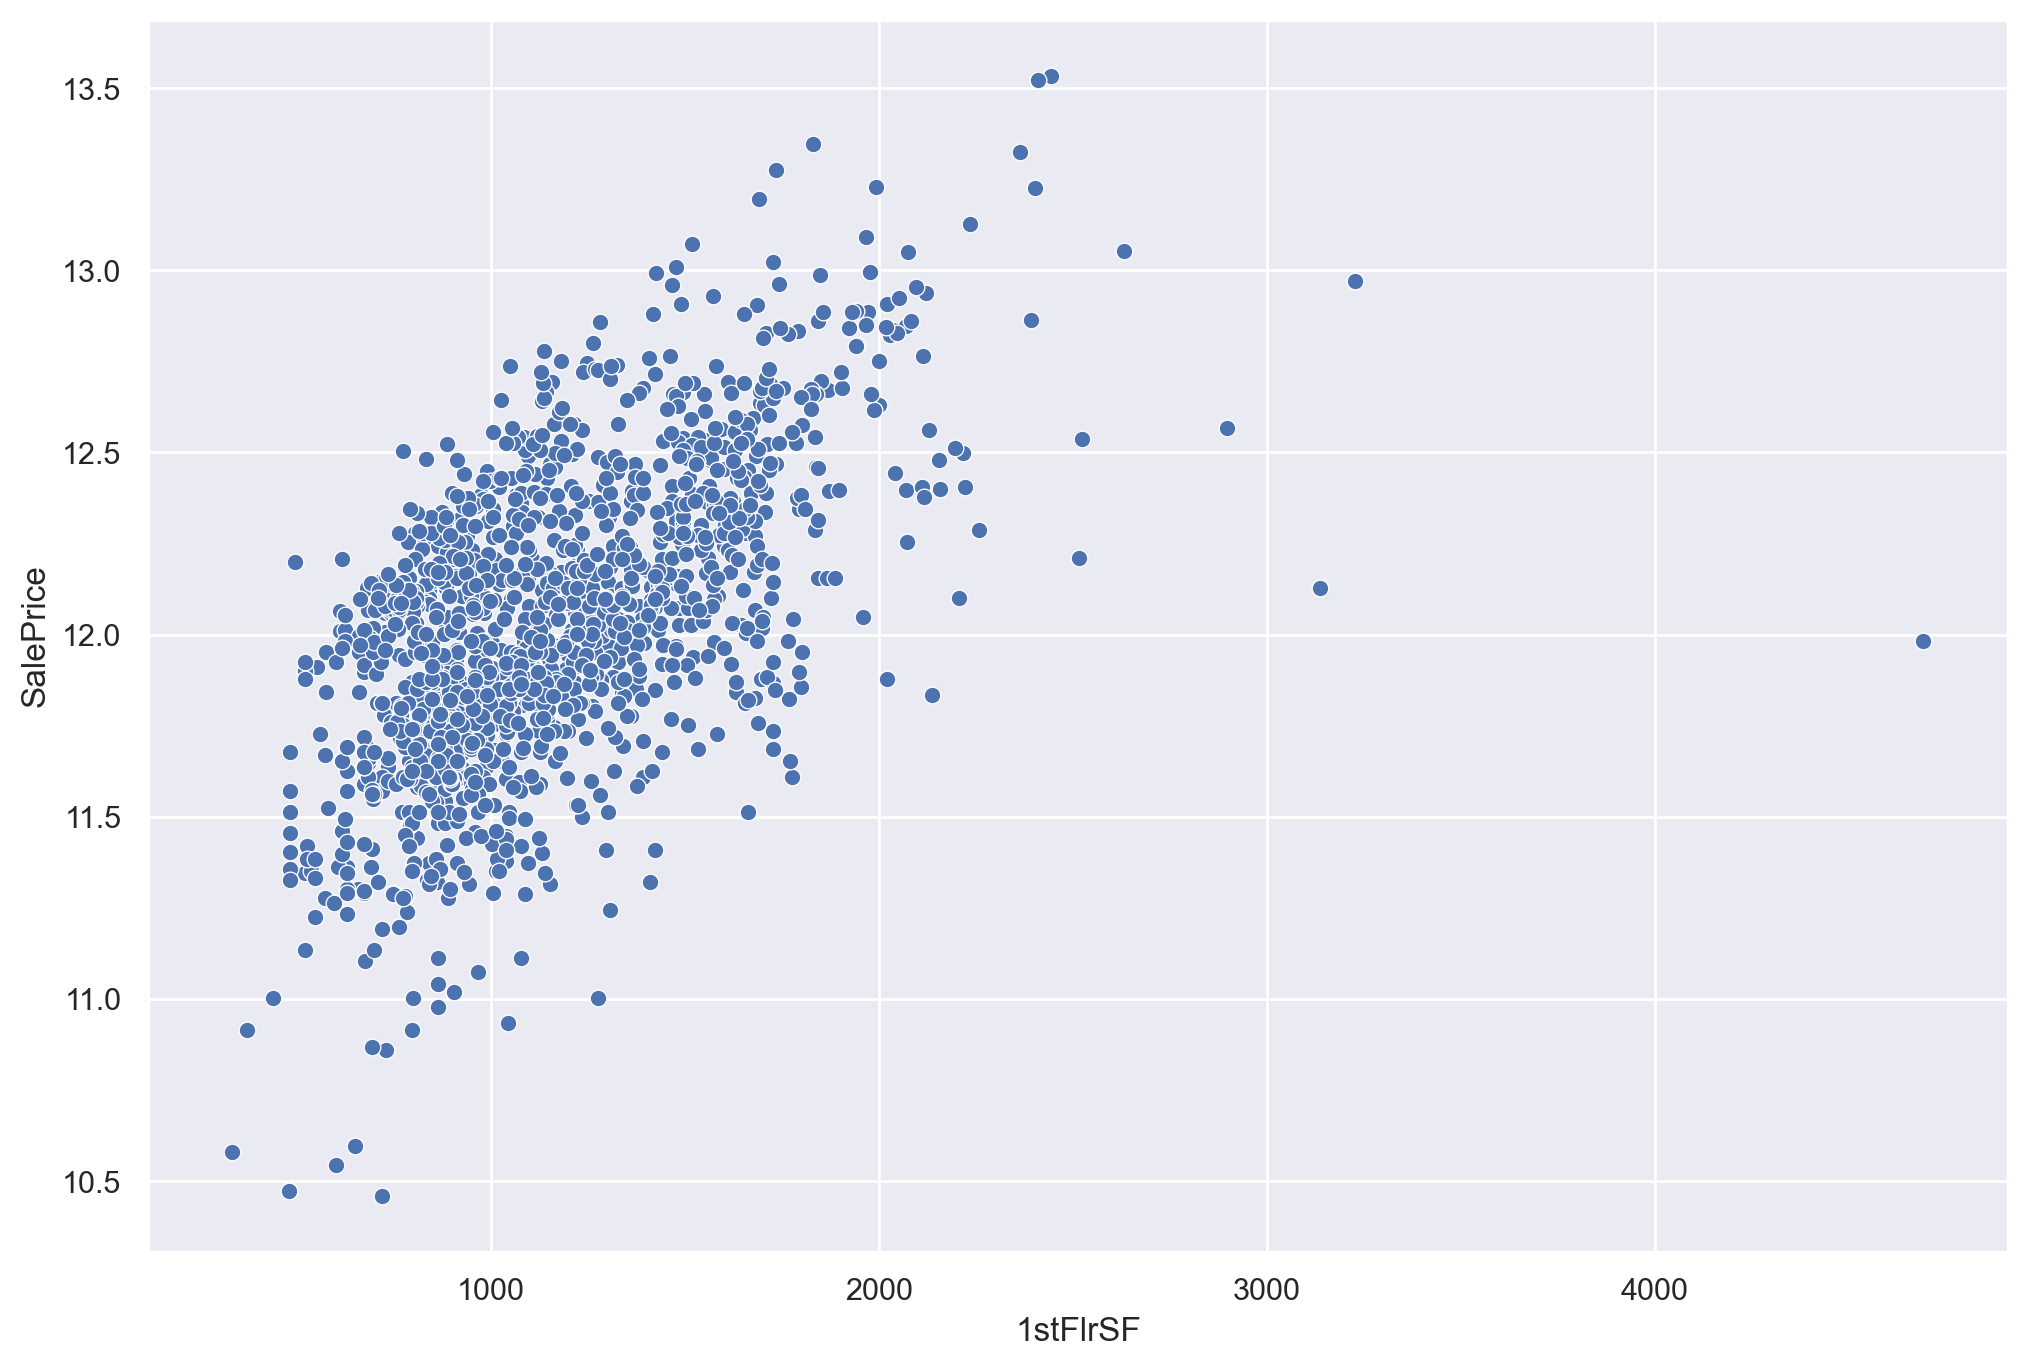

In [26]:
plt.figure(figsize=(12, 8), dpi=200)
sns.scatterplot(train, x='1stFlrSF', y='SalePrice')

<Axes: xlabel='FullBath', ylabel='SalePrice'>

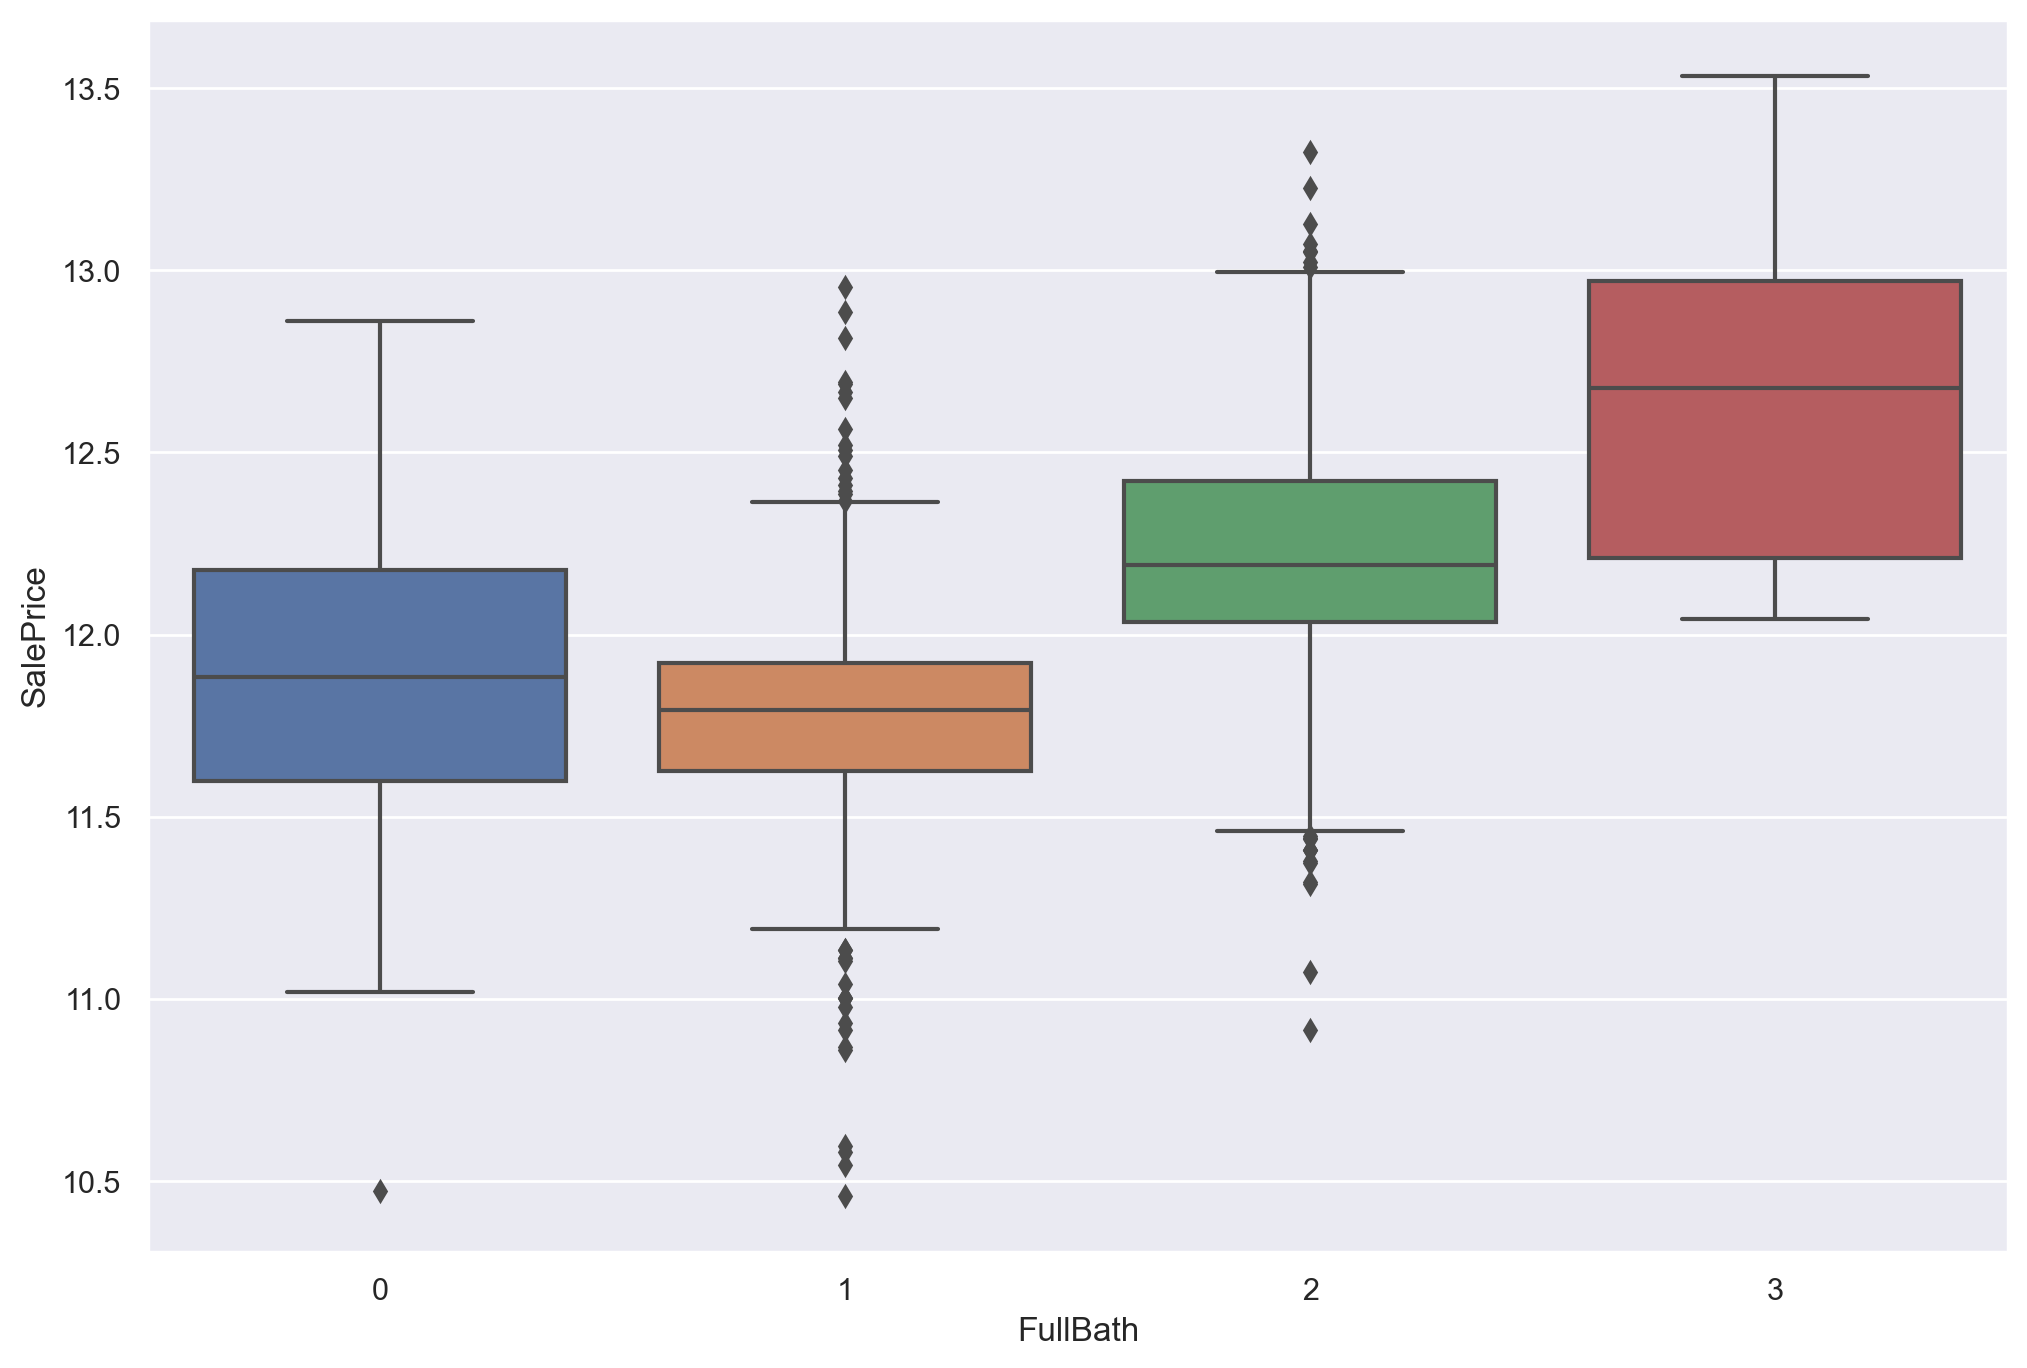

In [27]:
plt.figure(figsize=(12, 8), dpi=200)
sns.boxplot(train, x='FullBath', y='SalePrice')

## Data Cleaning (Очистка данных)<a class="anchor" id="data-cleaning"></a>

In [28]:
def drop_emissions():
    ## Перечень выбросов
    
    # Колонка GrLivArea
    em_grlivarea = train[(train['GrLivArea'] > 4000) & (train['SalePrice'] > 11.5)]
    # Колонка OverallQual
    em_overallqual = train[(train['OverallQual'] == 10) & (train['SalePrice'] < 12.5)]
    # Колонка LotFrontage
    em_lotfrontage = train[((train['LotFrontage'] > 300) & (train['SalePrice'] < 12.5)) |
                                  ((train['LotFrontage'] > 140) & (train['SalePrice'] < 11.0))]
    # Колонка GarageCars
    em_garagecars = train[((train['GarageCars'] == 4) & (train['SalePrice'] < 11.8)) |
                                ((train['GarageCars'] == 3) & (train['SalePrice'] < 11.5))]
    # Колонка GarageArea
    em_garagearea = train[(train['GarageArea'] > 1200) & (train['SalePrice'] < 12.5)]
    
    
    emissions = (em_grlivarea, em_overallqual, em_lotfrontage, em_garagecars)
    
    for em in emissions:
        train.drop(em.index, inplace=True, errors='ignore')
        
    
    train.reset_index(drop=True, inplace=True)

In [29]:
drop_emissions()

In [30]:
def get_nulls(df):
    nulls = pd.DataFrame(df.isna().sum().sort_values(ascending=False), columns=['Кол-во пропущенных'])
    nulls = nulls[nulls['Кол-во пропущенных']>0]
    return nulls

In [31]:
def clean_data(df):
    df['MSSubClass'] = df['MSSubClass'].astype(str)
    df['YrSold'] = df['YrSold'].astype(str)
    df['MoSold'] = df['MoSold'].astype(str)
    
    df['PoolQC'] = df['PoolQC'].fillna('None')
    df['MiscFeature'] = df['MiscFeature'].fillna('None')
    df['Alley'] = df['Alley'].fillna('None')
    df['Fence'] = df['Fence'].fillna('None')
    df['FireplaceQu'] = df['FireplaceQu'].fillna('None')
    
    df['LotFrontage'] = df['LotFrontage'].fillna(df['LotFrontage'].median())
    
    modes = ['MSZoning', 'Functional', 'Utilities', 'KitchenQual', 'SaleType', 'Electrical']
    for m in modes:
        df[m] = df[m].fillna(df[m].mode()[0])
    
    for column in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
        df[column] = df[column].fillna(0)
    
    for column in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
        df[column] = df[column].fillna('None')
    
    for column in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
        df[column] = df[column].fillna('None')
    
    objects = []
    for i in df.columns:
        if df[i].dtype == object:
            objects.append(i)
    df.update(df[objects].fillna('None'))
    
    numeric_dtypes = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    numeric = []
    for i in df.columns:
        if df[i].dtype in numeric_dtypes:
            numeric.append(i)
    df.update(df[numeric].fillna(0))

<Axes: xlabel='LotFrontage', ylabel='SalePrice'>

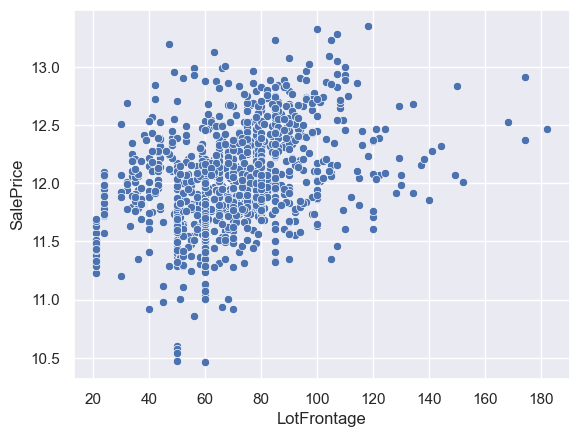

In [32]:
sns.scatterplot(train, x='LotFrontage', y='SalePrice')

In [33]:
rows_train = train.shape[0]
rows_train

1450

In [34]:
nulls = get_nulls(train)
target = train['SalePrice']

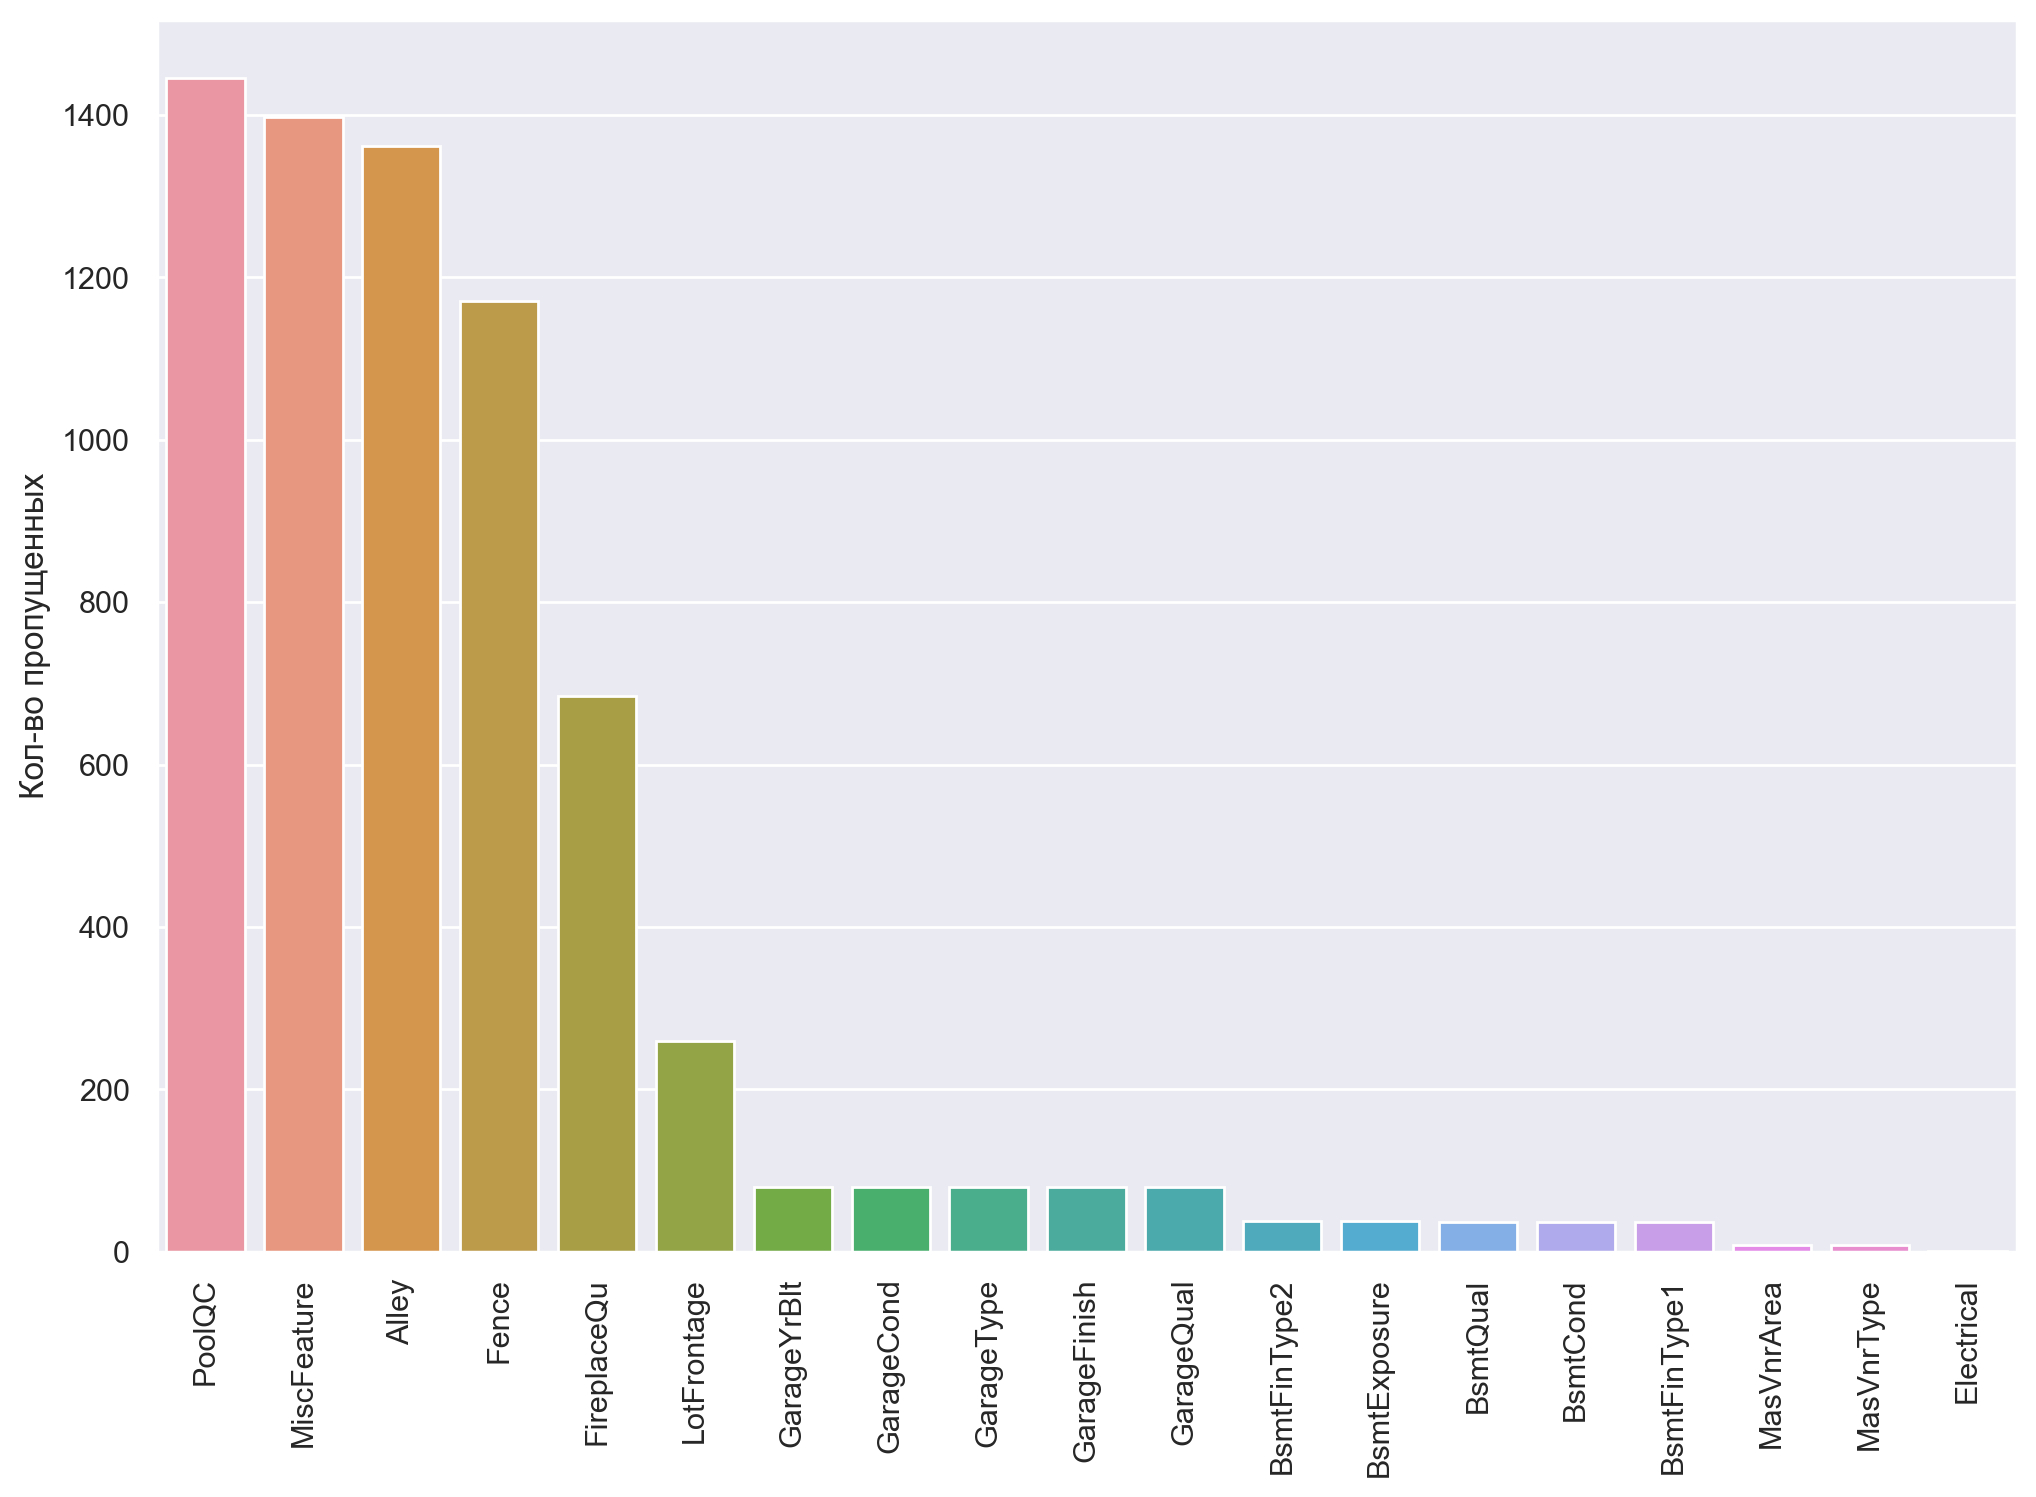

In [35]:
plt.figure(figsize=(12, 8), dpi=200)
sns.barplot(nulls, x=nulls.index, y='Кол-во пропущенных')
plt.xticks(rotation=90);

In [36]:
# Объединим тестовый и тренировочный набор для преобразования данных
all_df = pd.concat([train.iloc[:, :-1], test], axis=0).reset_index(drop=True)

In [37]:
all_df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2904,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
2905,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
2906,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
2907,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


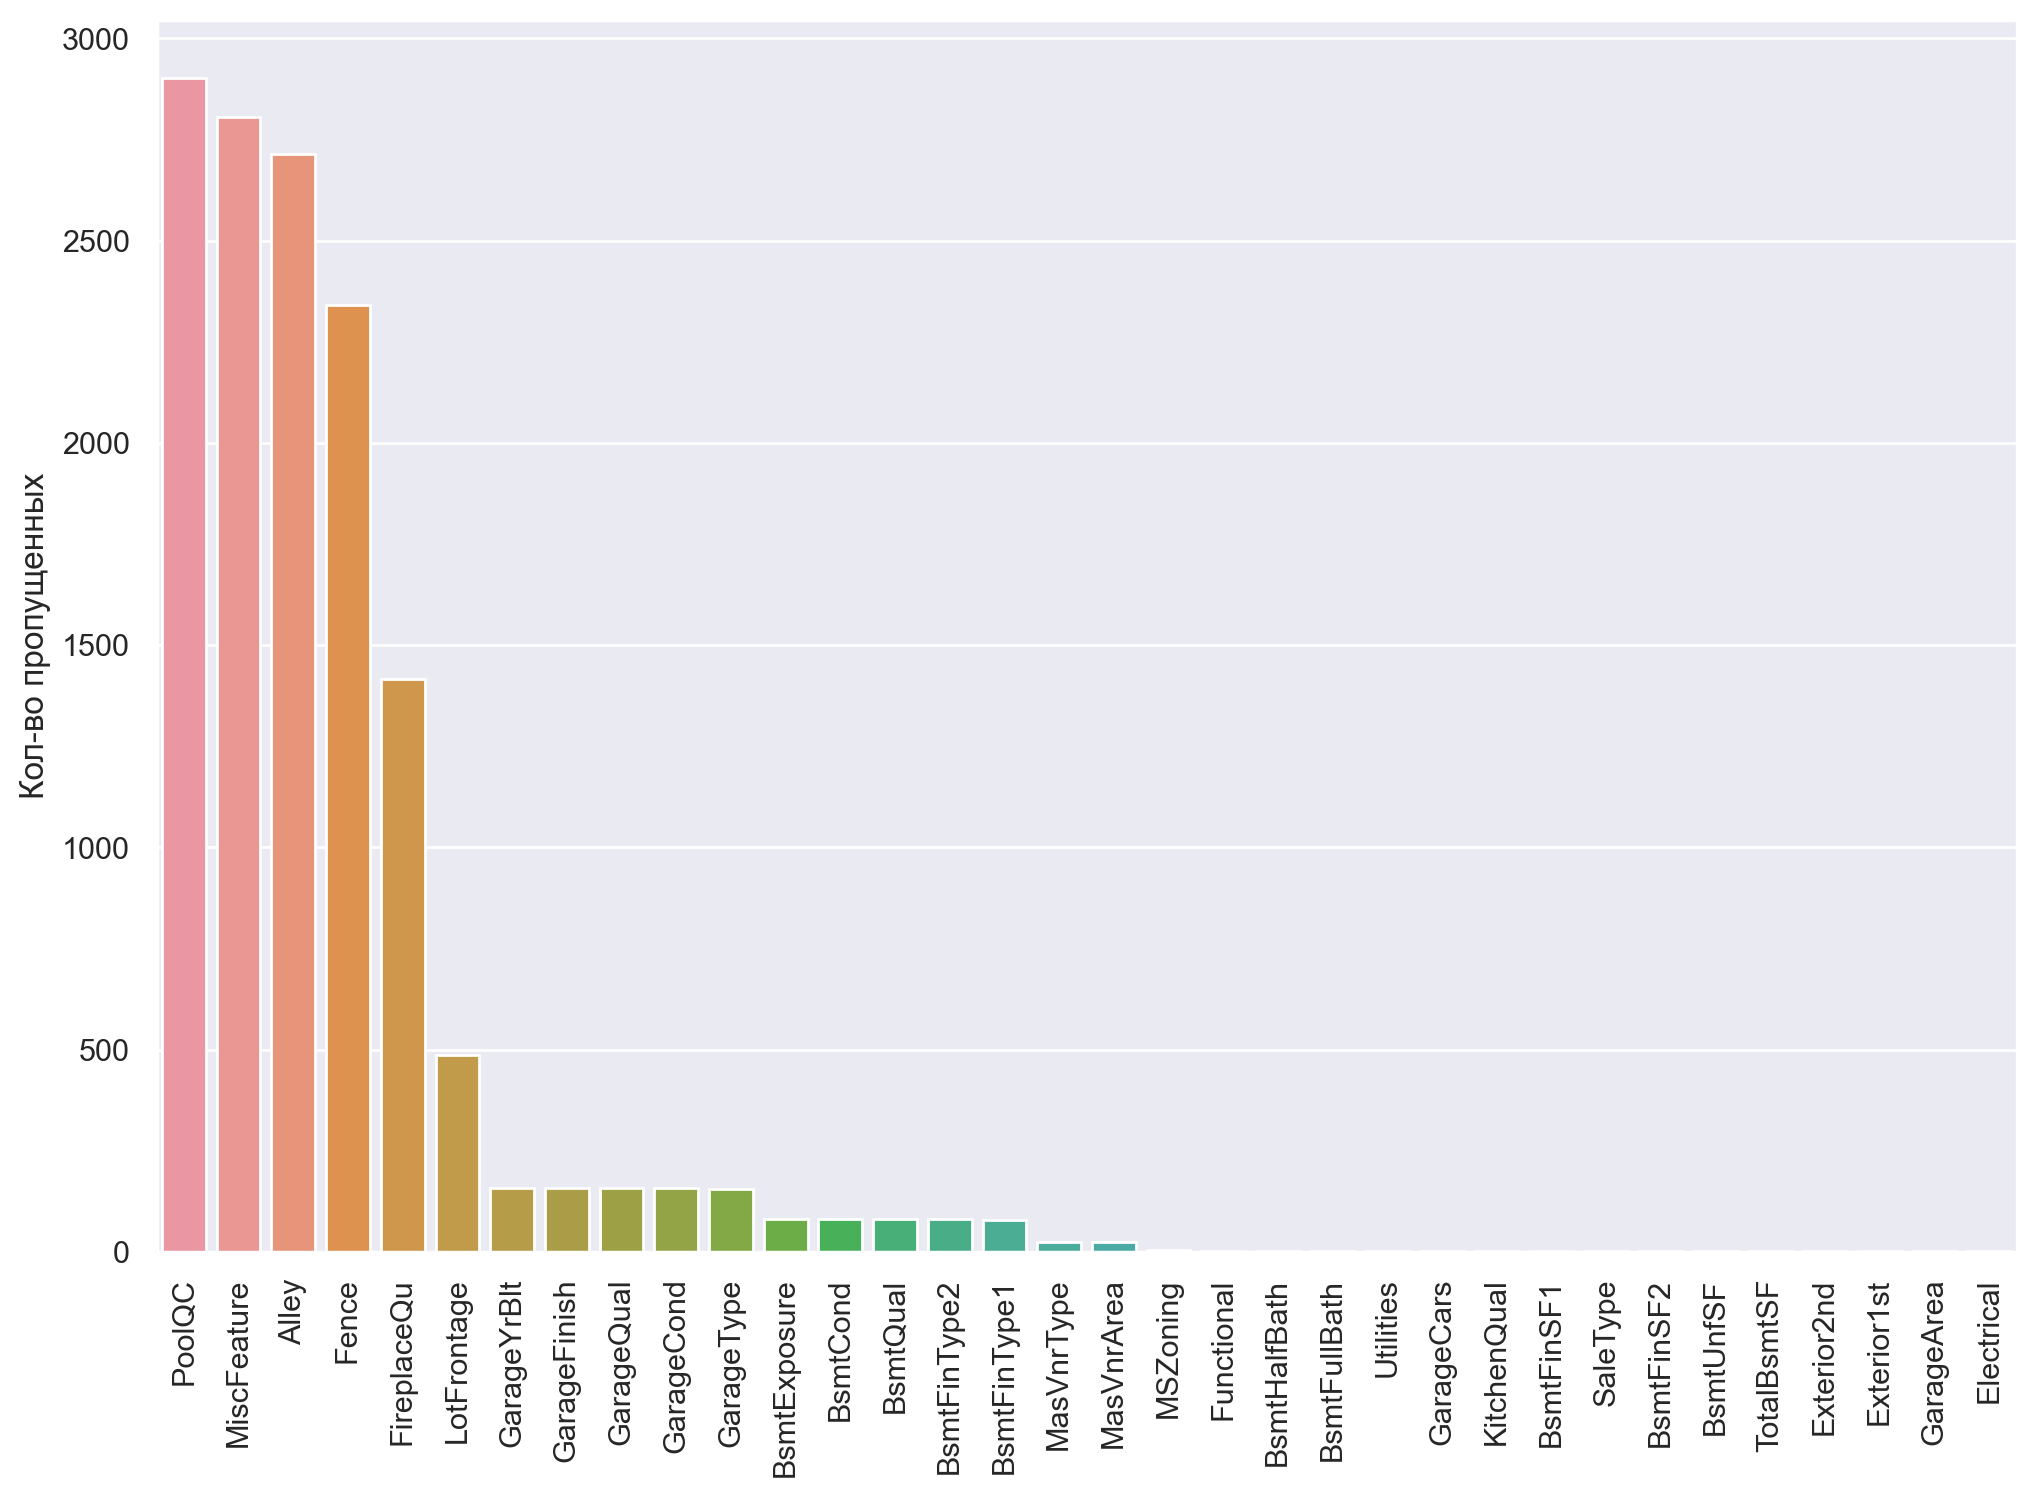

In [38]:
nulls_all = get_nulls(all_df)
plt.figure(figsize=(12, 8), dpi=200)
sns.barplot(nulls_all, x=nulls_all.index, y='Кол-во пропущенных')
plt.xticks(rotation=90);

In [39]:
print(get_nulls(all_df))
clean_data(all_df)
get_nulls(all_df)

              Кол-во пропущенных
PoolQC                      2901
MiscFeature                 2805
Alley                       2714
Fence                       2340
FireplaceQu                 1415
LotFrontage                  486
GarageYrBlt                  158
GarageFinish                 158
GarageQual                   158
GarageCond                   158
GarageType                   156
BsmtExposure                  82
BsmtCond                      82
BsmtQual                      81
BsmtFinType2                  80
BsmtFinType1                  79
MasVnrType                    24
MasVnrArea                    23
MSZoning                       4
Functional                     2
BsmtHalfBath                   2
BsmtFullBath                   2
Utilities                      2
GarageCars                     1
KitchenQual                    1
BsmtFinSF1                     1
SaleType                       1
BsmtFinSF2                     1
BsmtUnfSF                      1
TotalBsmtS

,Кол-во пропущенных


<Axes: xlabel='GarageYrBlt', ylabel='YearBuilt'>

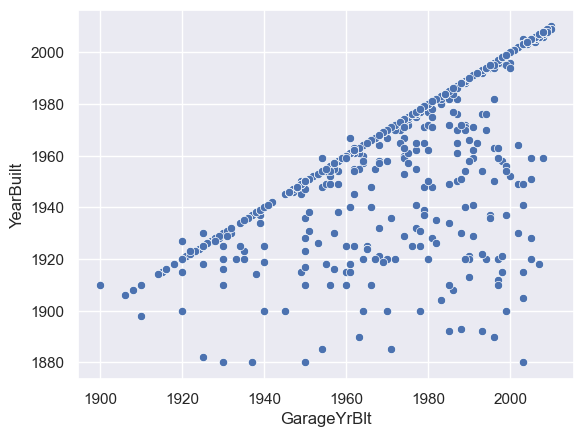

In [40]:
sns.scatterplot(train, x='GarageYrBlt', y='YearBuilt')

In [41]:
get_nulls(all_df)

,Кол-во пропущенных


In [46]:
all_df.drop(columns=['Id', 'PoolQC', 'MSSubClass'], inplace=True)
# all_df.drop(columns=['Id', 'Utilities', 'Street', 'PoolQC', 'MiscFeature', 'MiscVal', 'YearRemodAdd'], inplace=True)

KeyError: "['Id', 'PoolQC', 'MSSubClass'] not found in axis"

In [43]:
all_df.isna().sum().sum()

0

## Feature Engineering (Конструирование признаков)<a class="anchor" id="feat-eng"></a>

In [44]:
def counts(df):
    df['HasWoodDeck'] = df['WoodDeckSF'].apply(lambda x: 1 if x > 0 else 0)
    df['HasOpenPorch'] = df['OpenPorchSF'].apply(lambda x: 1 if x > 0 else 0)
    df['HasEnclosedPorch'] = df['EnclosedPorch'].apply(lambda x: 1 if x > 0 else 0)
    df['Has3SsnPorch'] = df['3SsnPorch'].apply(lambda x: 1 if x > 0 else 0)
    df['HasScreenPorch'] = df['ScreenPorch'].apply(lambda x: 1 if x > 0 else 0)
    df['HasPool'] = df['PoolArea'].apply(lambda x: 1 if x > 0 else 0)
    df['Has2ndFloor'] = df['2ndFlrSF'].apply(lambda x: 1 if x > 0 else 0)
    df['HasGarage'] = df['GarageArea'].apply(lambda x: 1 if x > 0 else 0)
    df['HasBsmt'] = df['TotalBsmtSF'].apply(lambda x: 1 if x > 0 else 0)
    df['HasFireplace'] = df['Fireplaces'].apply(lambda x: 1 if x > 0 else 0)    

In [193]:
def math_transform(df):
    df['SqFtPerRoom'] = df['GrLivArea'] / (df["TotRmsAbvGrd"] +
                                                       df["FullBath"] +
                                                       df["HalfBath"] +
                                                       df["KitchenAbvGr"])
    df['TotalSqrFootage'] = (df['BsmtFinSF1'] + df['BsmtFinSF2'] + df['1stFlrSF'] + df['2ndFlrSF'])
    df['TotalBathrooms'] = (df['FullBath'] + (0.5 * df['HalfBath']) + df['BsmtFullBath'] + (0.5 * df['BsmtHalfBath']))
    df['TotalPorchSF'] = (df['OpenPorchSF'] + df['3SsnPorch'] + df['EnclosedPorch'] + df['ScreenPorch'] + df['WoodDeckSF'])
    df['TotalHomeQuality'] = (df['OverallQual'] + df['OverallCond'])

In [194]:
## Стандартизация признаков
def standard_features(df):
    num_dtype = ['int64', 'float64', 'int32', 'float32', 'int16', 'float16']
    features = []
    for col in df.columns:
        if df[col].dtype in num_dtype:
            features.append(col)
    
    for f in features:
        if df[f].skew() > 0.5:
            df[f] = np.log1p(df[f])            

In [195]:
standard_features(all_df)
counts(all_df)
math_transform(all_df)

## Data Preprocessing (Предварительная обработка данных)<a class="anchor" id="data-prepr"></a>

In [196]:
all_df = pd.get_dummies(all_df, drop_first=True)

In [197]:
train = all_df.iloc[:rows_train, :]
test = all_df.iloc[rows_train:, :]

In [198]:
## Сброс индексов для test
test.reset_index(drop=True, inplace=True)

In [199]:
train = pd.concat([train, target], axis=1)

In [200]:
X = train.drop(columns='SalePrice')
y = train['SalePrice']

In [201]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Model Building (Построение модели)<a class="anchor" id="model-build"></a>

In [202]:
def get_error(y_pred, y_test):
    msa = mean_absolute_error(y_pred, y_test)
    rmse = np.sqrt(mean_squared_error(y_pred, y_test))
    
    print(f'MSA: {round(msa, 2)}\nRMSE: {round(rmse, 2)}')

In [203]:
# Setup Cross Validation
kf = KFold(n_splits=12, shuffle=True, random_state=11)

In [204]:
ridge_alphas = [6, 6.1, 6.2, 6.3]
lasso_alphas = [0.0005, 0.00055, 0.0006, 0.00065, 0.0007]

In [205]:
ridge = make_pipeline(RobustScaler(), RidgeCV(alphas=ridge_alphas))
lasso = make_pipeline(RobustScaler(), LassoCV(alphas=lasso_alphas, max_iter=1000000, random_state=11,
                                              cv=kf))
gbr = make_pipeline(RobustScaler(), GradientBoostingRegressor(learning_rate=0.01,
                                      max_depth=5, 
                                      n_estimators=1000,  
                                      subsample=0.2))

In [206]:
ridge.fit(X_train, y_train).score(X_test, y_test)

0.9023068435600433

In [207]:
test_residuals = np.expm1(y_test) - np.expm1(ridge.predict(X_test))

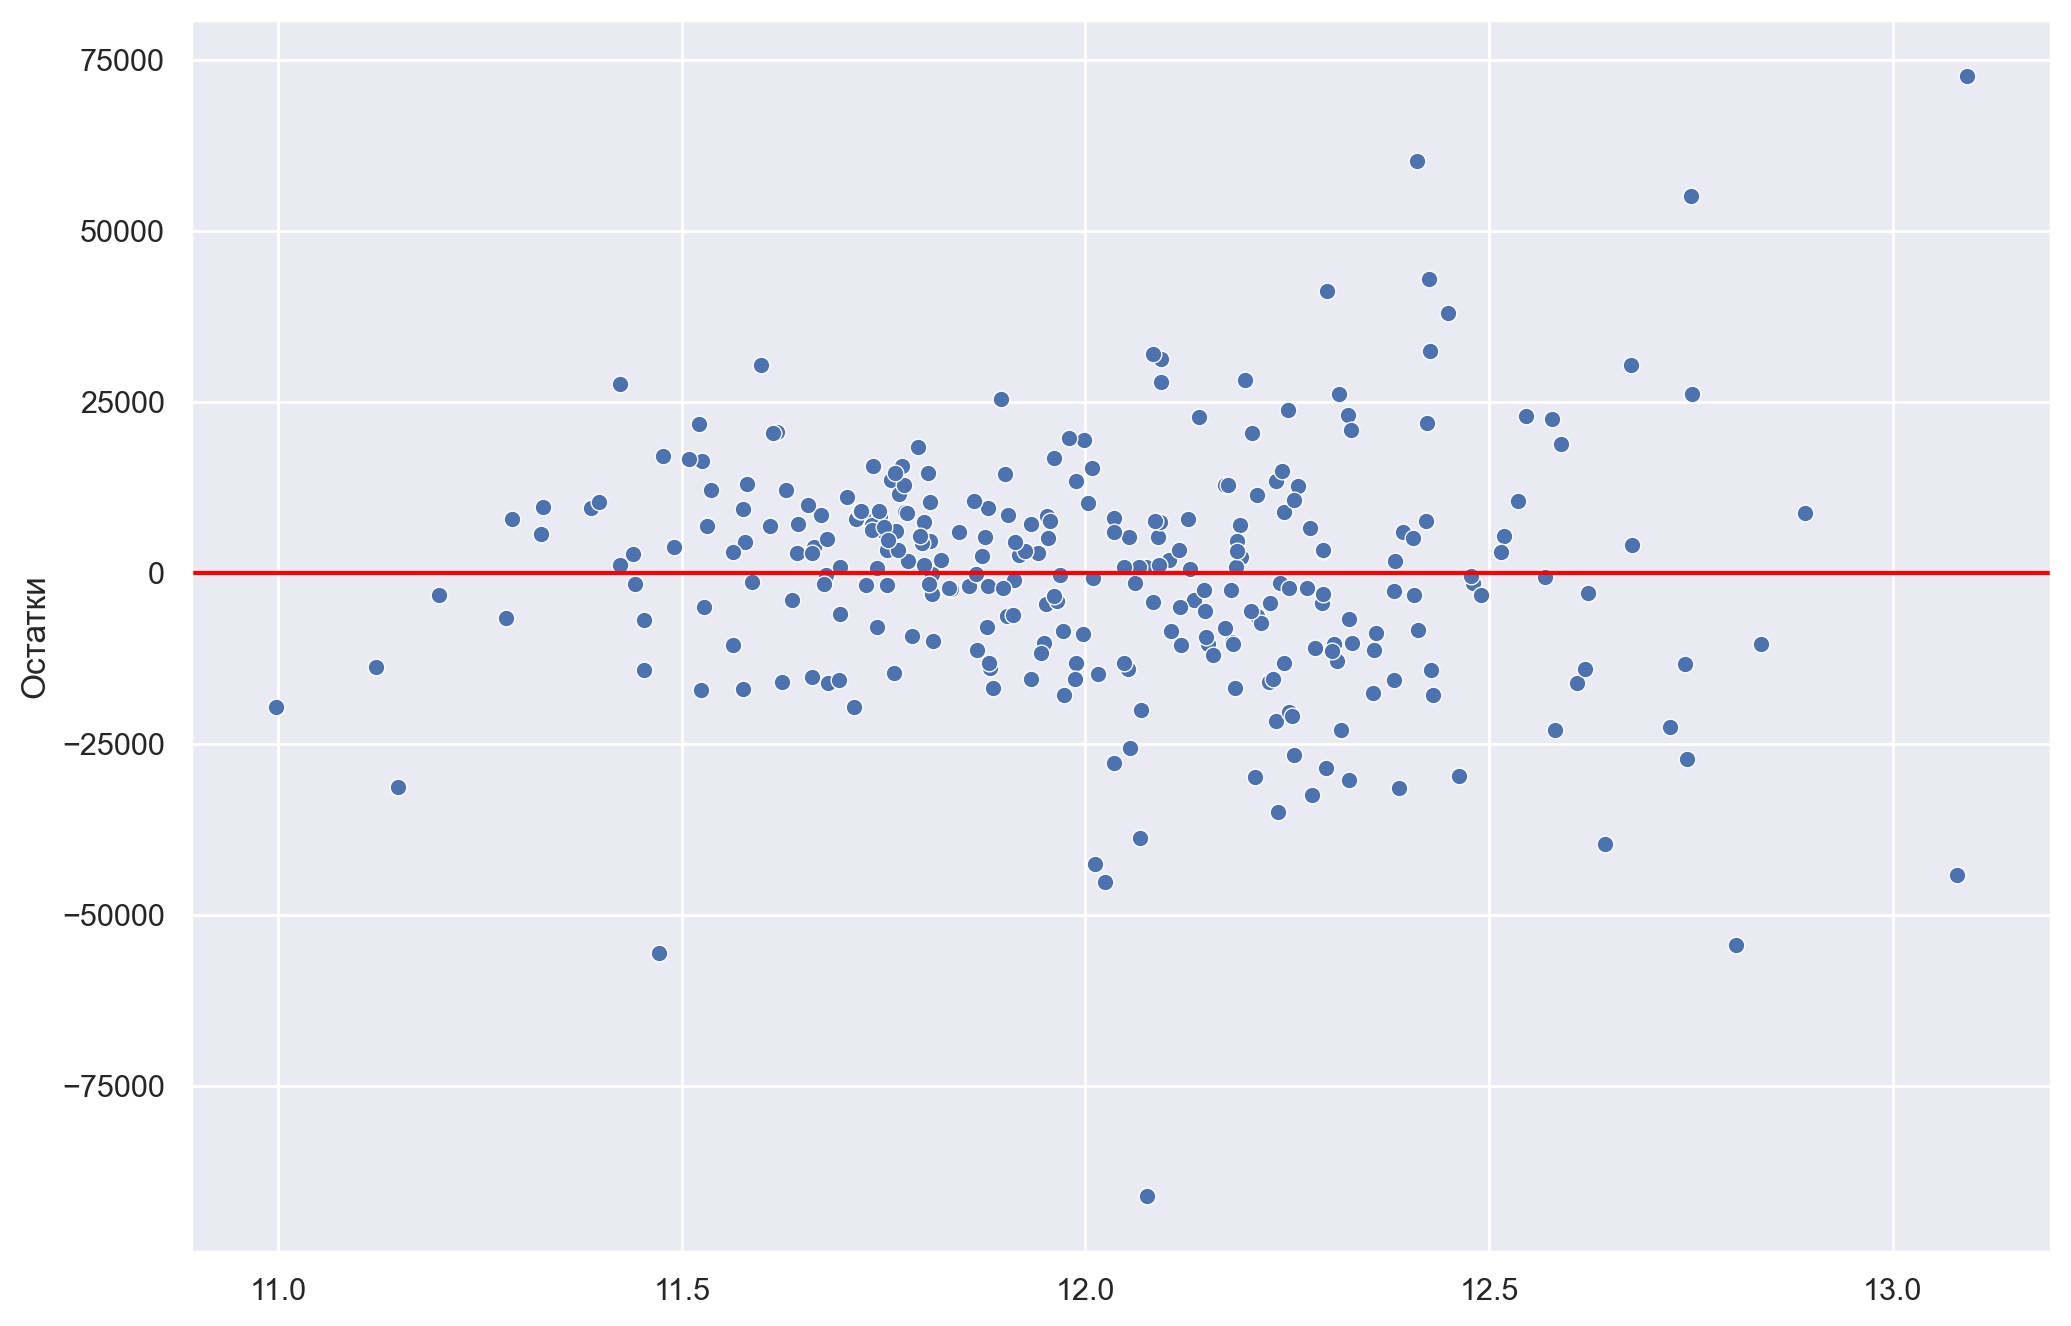

In [208]:
# График остатков
plt.figure(figsize=(12, 8), dpi=200)
sns.set(font_scale=1)
sns.scatterplot(x=y_pred, y=test_residuals)
plt.axhline(y=0, color='red')
plt.ylabel('Остатки');

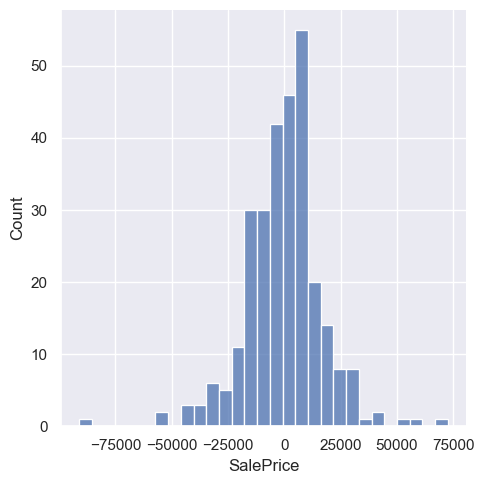

In [209]:
sns.displot(test_residuals)

## Predict (Предсказание)<a class="anchor" id="predict"></a>

In [210]:
def get_normal_y(y):
    return np.expm1(y)

In [211]:
y_pred = ridge.predict(X_test)

In [212]:
get_error(get_normal_y(y_pred), get_normal_y(y_test))

MSA: 12625.19
RMSE: 17600.25


## Save Results (Сохранение результатов)<a class="anchor" id="save-res"></a>

In [213]:
def save_results(name_file, model):
    try:
        test_pred = pd.Series(np.expm1(model.predict(test)), name='SalePrice')
        res = pd.DataFrame([test_id, test_pred]).transpose()
        res.Id = res.Id.astype('int64')
        res.to_csv(name_file, index=False)
        print(f'-- Файл {name_file} успешно сохранен --')
    except:
        print('-- Возникла ошибка при сохранении результатов в файл --')

In [217]:
save_results('ridge.csv', ridge)

-- Файл ridge.csv успешно сохранен --
